In [1]:
import keras
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from PIL import Image
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Activation, Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D, AveragePooling2D, Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D

Using TensorFlow backend.
C:\Users\AKI\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AKI\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AKI\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AKI\AppData\Roaming\Pyt

In [2]:
# Preprocessing the Data
error = os.listdir('E:/data/cone_dataset/P/') 
correct = os.listdir('E:/data/cone_dataset/C/')
data = []
labels = []

for i in error:
    try:
    
        img = cv2.imread('E:/data/cone_dataset/P/'+i)
        img_array = Image.fromarray(img , 'RGB')
        resize_img = img_array.resize((200 , 200))
        data.append(np.array(resize_img))
        #print(resize_img)
        label = to_categorical(1, num_classes=2)
        labels.append(label)
        #print(label)
        
    except AttributeError:
      pass
        #print('')
print(len(data))


for i in correct:    
    try:
        img = cv2.imread('E:/data/cone_dataset/C/'+i)
        img_array = Image.fromarray(img , 'RGB')
        resize_img = img_array.resize((200 , 200))
        data.append(np.array(resize_img))
        label = to_categorical(0, num_classes=2)
        labels.append(label)
        
    except AttributeError:
      pass
        #print('')
        
print(len(data))

5624
11870


In [3]:
# Preprocessing the UNKNOWN Data
pred_error = os.listdir('E:/data/cone_dataset/pred_P/') 
pred_correct = os.listdir('E:/data/cone_dataset/pred_C/')
pred_data = []
pred_labels = []

for k in pred_error:
    try:
    
        pred_img = cv2.imread('E:/data/cone_dataset/pred_P/'+k)
        pred_img_array = Image.fromarray(pred_img , 'RGB')
        pred_resize_img = pred_img_array.resize((200 , 200))
        pred_data.append(np.array(pred_resize_img))
        #print(resize_img)
        label = to_categorical(1, num_classes=2)
        pred_labels.append(label)
        #print(label)
        
        
    except AttributeError:
      pass
        #print('')
print(len(pred_data))

for j in pred_correct:
    
    try:
        pred_img = cv2.imread('E:/data/cone_dataset/pred_C/'+j)
        pred_img_array = Image.fromarray(pred_img , 'RGB')
        pred_resize_img = pred_img_array.resize((200 , 200))
        pred_data.append(np.array(pred_resize_img))
        label = to_categorical(0, num_classes=2)
        pred_labels.append(label)
        
    except AttributeError:
      pass
        #print('')
        
print(len(pred_data))

100
291


In [4]:
# Creates labels
data = np.array(data)
labels = np.array(labels)
print(data.shape , labels.shape)

(11870, 200, 200, 3) (11870, 2)


In [5]:
# Creates unknown data labels
pred_data = np.array(pred_data)
pred_labels = np.array(pred_labels)
print(pred_data.shape , pred_labels.shape)

(291, 200, 200, 3) (291, 2)


In [6]:
# data + labels and normalizes the data.
n = np.arange(data.shape[0])
np.random.shuffle(n)
data = data[n]
labels = labels[n]  # one hot-coding

data = data.astype(np.float32)
labels = labels.astype(np.int32)
data = data/255

In [7]:
#unknown
# data + labels and normalizes the data.
n = np.arange(pred_data.shape[0])
np.random.shuffle(n)
pred_data = pred_data[n]
pred_labels = pred_labels[n]  # one hot-coding

pred_data = pred_data.astype(np.float32)
pred_labels = pred_labels.astype(np.int32)
pred_data = pred_data/255

In [8]:
# split the data into train, validation, and test sets.
# The train set will consist of 60% of the data and the validation and test sets will each consist of 20% of the data.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(7596, 200, 200, 3) (1900, 200, 200, 3) (2374, 200, 200, 3)
(7596, 2) (1900, 2) (2374, 2)


In [9]:
# 建立模型
# STEP1. 建立卷積層與池化層 
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(3,3),  
                 padding='same',  
                 input_shape=(200,200,3),  
                 activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer  
model.add(Dropout(0.2))  


# Create CN layer 2  
model.add(Conv2D(filters=32,  
                 kernel_size=(3,3),  
                 padding='same',
                 activation='relu'))    
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))    
# Add Dropout layer  
model.add(Dropout(0.3))

# Create CN layer 3  
model.add(Conv2D(filters=64,  
                 kernel_size=(3,3),  
                 padding='same',
                 activation='relu'))    
# Create Max-Pool 3  
model.add(MaxPooling2D(pool_size=(2,2)))    
# Add Dropout layer  
model.add(Dropout(0.3))

# Create CN layer 4  
model.add(Conv2D(filters=64,  
                 kernel_size=(3,3),  
                 padding='same',
                 activation='relu'))    
# Create Max-Pool 4  
model.add(MaxPooling2D(pool_size=(2,2)))    
# Add Dropout layer  
model.add(Dropout(0.3))

In [10]:
# STEP2. 建立神經網路 
# - 建立平坦層
model.add(Flatten())

# - 建立 Hidden layer 
model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.5))

# - 建立輸出層
model.add(Dense(2, activation='softmax')) 

In [11]:
# STEP3. 查看模型的摘要 
model.summary()  
print("") 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)       

In [12]:
# 進行訓練
# STEP1. 定義訓練並進行訓練 
# 定義訓練方式  
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=6000, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7596 samples, validate on 1900 samples
Epoch 1/6000
7596/7596 [==============================] - 7s 904us/step - loss: 0.6003 - accuracy: 0.6588 - val_loss: 0.4911 - val_accuracy: 0.8142
Epoch 2/6000
7596/7596 [==============================] - 5s 688us/step - loss: 0.4265 - accuracy: 0.7962 - val_loss: 0.3366 - val_accuracy: 0.9142
Epoch 3/6000
7596/7596 [==============================] - 5s 689us/step - loss: 0.2942 - accuracy: 0.8681 - val_loss: 0.2060 - val_accuracy: 0.9111
Epoch 4/6000
7596/7596 [==============================] - 5s 690us/step - loss: 0.2016 - accuracy: 0.9003 - val_loss: 0.0908 - val_accuracy: 0.9642
Epoch 5/6000
7596/7596 [==============================] - 5s 692us/step - loss: 0.1428 - accuracy: 0.9272 - val_loss: 0.0549 - val_accuracy: 0.9879
Epoch 6/6000
7596/7596 [==============================] - 5s 690us/step - loss: 0.1207 - accuracy: 0.9517 - val_loss:

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


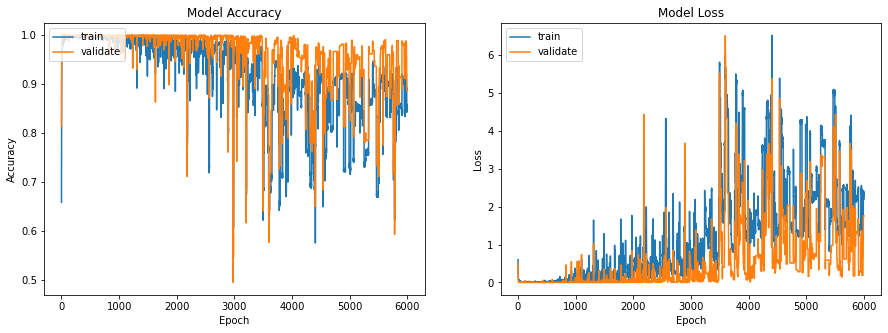

In [26]:
# STEP2. 畫出 accuracy 執行結果 
import matplotlib.pyplot as plt
def plotmodelhistory(train_history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(train_history.history['accuracy']) 
    axs[0].plot(train_history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(train_history.history['loss']) 
    axs[1].plot(train_history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in historydata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA3gAAAFNCAYAAABSRs15AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy86wFpkAAAACXBIWXMAAAsTAAALEwEAmpwYAACT1UlEQVR4nOzdd3hc1fHw8e9otWqrahUXWe7dxh1TQ+81EHonJARSCJCeX17Se0IIJRBCaAm9JYTQQu/FNsbd2BgXSbbVe1+d94+zK8myykra3btlPs+jZ6Ut945lW1ezc86MGGNQSimllFJKKRX9EpwOQCmllFJKKaVUcGiCp5RSSimllFIxQhM8pZRSSimllIoRmuAppZRSSimlVIzQBE8ppZRSSimlYoQmeEoppZRSSikVIzTBU2qERGSSiBgRSQzguZeJyFvhiEsppZSKVnptVWr4NMFTcUVEtolIm4jk9bp/le9CMsmh0HrG4hGRBhF51ulYlFJKqcFE8rV1KImiUrFCEzwVjz4Dzvd/ISL7AanOhbOPs4BW4DgRGRvOE+sFUCml1DBF+rVVqbihCZ6KR/8ALunx9aXA/T2fICJZInK/iJSLyHYR+ZGIJPgec4nIH0SkQkS2Aif38dq/i8guESkRkV+IiGsI8V0K3AGsBi7sdexDReQdEakRkZ0icpnv/lQR+aMv1loRect33xEiUtzrGNtE5Bjf5z8RkcdF5J8iUgdcJiLLRORd3zl2icitIpLU4/VzReR/IlIlIntE5IciMkZEmkQkt8fzlvi+f+4h/NmVUkpFp0i/tu5DRMaJyNO+69kWEflyj8eWichyEanzXetu9N2f4rtmVvqukx+KyOiRxKFUsGmCp+LRe0CmiMz2XRzOBf7Z6zm3AFnAFOBw7EXrct9jXwZOARYBS7EVt57uAzqAab7nHAd8KZDARGQCcATwgO/jkl6PPeeLLR9YCKzyPfwHYAlwMDAK+C7QGcg5gdOBx4Fs3zm9wHVAHnAQcDTwVV8MGcBLwPPAON+f8WVjzG7gNeCcHse9CHjYGNMeYBxKKaWiV8ReWwfwEFCMvZ6dBfxKRI72PfZn4M/GmExgKvCo7/5LfX+GIiAXuApoHmEcSgWVJngqXvnfaTwW2AiU+B/ocWH6gTGm3hizDfgjcLHvKecANxljdhpjqoBf93jtaOBE4FpjTKMxpgz4E3BegHFdAqw2xqzHXnjmisgi32MXAi8ZYx4yxrQbYyqNMat8735+EfimMabEGOM1xrxjjGkN8JzvGmP+ZYzpNMY0G2NWGGPeM8Z0+P7sf8VeiMFefHcbY/5ojGnxfX/e9z12Hzap838Pz8d+n5VSSsWHSL227kNEioBDge/5rmergLt6xNMOTBORPGNMgzHmvR735wLTfNfbFcaYuuHGoVQo6H4bFa/+AbwBTKbXEhJs5SoJ2N7jvu1Aoe/zccDOXo/5TQTcwC4R8d+X0Ov5A7kE+BuAMaZURF7Hvlv4Efbdwk/7eE0ekNLPY4HYKzYRmQHciH0HNQ37c2KF7+H+YgD4N3CHiEwBZgC1xpgPhhmTUkqp6BOp19a+jAOqjDH1vc651Pf5FcDPgI0i8hnwU2PMM9g/YxHwsIhkY6uU/6erVVQk0QqeikvGmO3YDeEnAU/2ergC+w7dxB73TaD7nchd2B/uPR/z24ltkJJnjMn2fWQaY+YOFpOIHAxMB34gIrtFZDdwAHC+r/nJTuwykd4qgJZ+HmvEJmn+c7iwyzt7Mr2+vh37zut039KUHwL+K2p/MWCMacEuYbkQ+w6oVu+UUiqOROK1dQClwCjf1oN94jHGbDbGnA8UAL8FHhcRj28FzU+NMXOw2yJOYe+9h0o5ThM8Fc+uAI4yxjT2vNMY48UmKr8UkQwRmQhcT/degkeBa0RkvIjkAN/v8dpdwIvAH0UkU0QSRGSqiBzO4C4F/gfMwe6vWwjMwyZoJ2L3xx0jIueISKKI5IrIQmNMJ3A3cKNvw7hLRA4SkWTgEyBFRE72NTv5EZA8SBwZQB3QICKzgKt7PPYMMEZErhWRZN/354Aej98PXAacxr57L5RSSsW+SLu2+iX7GqSkiEgKNpF7B/i17775vtgfABCRi0Qk33eNrfEdwysiR4rIfr43TOuwSat3CHEoFXKa4Km4ZYz51BizvJ+Hv4Gtfm0F3gIexCZRYJdQvgB8DKxk33cpL8EuQ1kPVGMbmAw47sB3sTkHuMUYs7vHx2fYStilxpgd2HdFvwVUYRusLPAd4tvAGuBD32O/BRKMMbXYBil3YS9mjdgN5QP5NnABUO/7sz7if8C3lOVY4FRgN7AZOLLH429jm7us9O2vUEopFUci6draSwO2GYr/4yjsXvFJ2GreU8CPjTH/8z3/BGCdiDRgG66c51upMsZ37jpgA/A6+oamijBiTO/VWUopNXwi8grwoDHmLqdjUUoppZSKN5rgKaWCRkT2xy4zLeq1cV0ppZRSSoWBLtFUSgWFiNyHnZF3rSZ3SimllFLO0AqeUkoppZRSSsUIreAppZRSSimlVIzQBE8ppZRSSimlYkSi0wEMVV5enpk0aZLTYSillAqDFStWVBhj8p2OI1roNVIppeLDQNfHqEvwJk2axPLl/Y1XUUopFUtEZLvTMUQTvUYqpVR8GOj6qEs0lVJKKaWUUipGaIKnlFJKKaWUUjFCEzyllFJKKaWUihFRtwevL+3t7RQXF9PS0uJ0KBEvJSWF8ePH43a7nQ5FKaVUGOg1MnB6jVRKxYKYSPCKi4vJyMhg0qRJiIjT4UQsYwyVlZUUFxczefJkp8NRSikVBnqNDIxeI5VSsSImlmi2tLSQm5urF65BiAi5ubn6Lq5SSsURvUYGRq+RSqlYERMJHqAXrgDp90kppeKP/uwPjH6flFKxIGYSPCfV1NTwl7/8ZcivO+mkk6ipqQl+QEoppVSE0GukUkqFlyZ4QdDfxcvr9Q74umeffZbs7OwQRaWUUko5T6+RSikVXjHRZMVp3//+9/n0009ZuHAhbreb9PR0xo4dy6pVq1i/fj2f//zn2blzJy0tLXzzm9/kyiuvBGDSpEksX76chuoKTjzt8xx66Od45513KCws5N///jepqakO/8mUUkqpkRnxNbKhgRNPPJFDDz1Ur5FKqei35nFIHw2TPxeyU2gFLwh+85vfMHXqVFatWsXvf/97PvjgA375y1+yfv16AO6++25WrFjB8uXLufnmm6msrOx+sTFQs53Nm7fwtS9exLp168jOzuaJJ55w6E+jlFJKBc+IrpE+mzdv5mtf+5peI5VS0e+ln8DK+0N6ipir4P30P+tYX1oX1GPOGZfJj0+dG/Dzly1btleL5ZtvvpmnnnoKgJ07d7J582Zyc3Ptg9526Oxg8oRCFk7MhNqdLFm8mG3btgXzj6CUUkpF3zXSZ/LkySxcuBCAJUuW6DVSKRWd2pqgdifkXRLS08RcghcJPB5P1+evvfYaL730Eu+++y5paWkcccQRe7dgbm8CIDnVA54CaCzD1VJNc2dSuMNWSimlQm5I10if5OTkrs9dLhfNzc1hiVUppYKqcou9zZ0W0tPEXII3lHcRgyUjI4P6+vo+H6utrSUnJ4e0tDQ2btzIe++9t/cT2psBAUmArEJISoPOdmiqg9Z6SM4I/R9AKaVUXIi6a6RSSsWSys32Nm9GSE8TcwmeE3JzcznkkEOYN28eqampjB49uuuxE044gTvuuIP58+czc+ZMDjzwwL1f3N4Iid3vTJKaA558aC62WX7GOEgvAJ3No1TE6PB2kujSLcxKBWJE10illIolFVsAgdypIT2NGGNCeoJgW7p0qVm+fPle923YsIHZs2c7FNEIGAO7V0NaLmSN3/uxTi/U7ICWGkjJguwJkBCcfDxqv19KOayto5NbXtnMX1/fysnzx/LdE2YyNks7+YWSiKwwxix1Oo5oEVPXSIfo90spFTKPXwE7P4Dr1oz4UANdH/UtaCe1N4PpBHfavo8luCBnEmQWQksdlH/iW86plHLC2pJaTrv1LW55ZQv7T87hv2t2ceQfXuPGFzfR2NrhdHhKKaWUinSVmyFveshPo0s0neRrsEKSp+/HRezyTHcaVH8GFZ9AVhGkjQpfjErFuXZvJ7e9uoVbX9lCjieJv1+6lKNnj2ZnVRO/e2ETN7+yhYc/3Mm3j5/JWYvHk5Cgy6mVUkop1Ysxdonm4oNCfiqt4DmpvdEuu3QN0jEzOR3yZ4E7FWq22/aqpjM8MSoVxzbsquP0W9/mppc2c+qCcfzvusM4erbdP1Q0Ko1bzl/EE1cfzLjsVL77+GpOvfUt3v103xle8ebT8gZ++p91dHZG1xaAYBORIhF5VUQ2iMg6EflmH88REblZRLaIyGoRWdzjsRNEZJPvse+HN3qllFJBVVdqf/cPcQdN0ATPWW1NtjoXSAMVl9v+g/AUQGOFfQegoy30MSoVhzq8ndz6ymZOu/Utyupb+OvFS/jTuQvJTtv3zZglE3N46qsH8+fzFlLT1M75f3uPK+9fzraKRgcid1ZTWwe/e34jJ9z0Bo+vKObT8ganQ3JaB/AtY8xs4EDgayIyp9dzTgSm+z6uBG4HEBEXcJvv8TnA+X28VimlVLQIUwdN0CWazun0QkcLpGYH/pqeoxRqdkDFJrtPT0cpqAjU2Wmicrnipt31fPuxj1lTUsupC8bx09PmMsozcJVdRDh9YSHHzx3D39/6jL+8uoVj//Q6lxw0iWuOmk5WmjtM0TvDGMML6/bw82fWU1LTzBcWj+f7J84iPyN58BfHMGPMLmCX7/N6EdkAFALrezztdOB+YzuevSci2SIyFpgEbDHGbAUQkYd9z+35WqWUUtGiwp/g6R682OXff+fuZ//dQFJzIDHV7svTUQrKAS3tXnbXtrC7roU9dS3sqm2xX/vu213bQnlDK4dNz+P2i5aQ4nY5HfKgOryd3PnmVm7632bSUxL5y4WLOWm/sUM6RorbxdeOnMbZS8dz44ufcPfbn/HEymKuPXo6Fx44EXcMjlbYVtHIT/6zjtc2lTNrTAaPfuUglk3WfcK9icgkYBHwfq+HCoGdPb4u9t3X1/0HhDBEpZQauV0f25Vm0452OpLIU7EZktIhY2i/WwyHJngOSE9Pp2HXFkp3l3PNN37B4088sc9zjjjiCP7whz+wdGk/3cHdKdz0wHNcefYJpNX71vQGcZSCCp3OTsPa0lpe21TO65+U88meegoykhmXnUphdirj/B9ZKYzLTmVMVkrYEiRvp6GuuZ099XsnbHslcXUt1DS17/Pa9ORExmSlMCYzhUOn55GcmMCDH+zg6n+u4K8XLyUpMXKTmy1l9XzrsdV8vLOGE+eN4eefn0de+vCrTwUZKfzmC/O55KBJ/OK/6/nJf9bzj/e2838nz+bImQVIDLwZ09Lu5S+vfcodr39KkiuB/3fKHC49aKLOB+yDiKQDTwDXGmPqej/cx0vMAPf3dfwrscs7mTBhwggijQzp6ek0NDRQWlrKNddcw+OPP77Pcwa9RgI33XQTV155JWlpfXSqVkqFxks/tU0Br1vrdCSRp3Kz3W4Vht8BNBtwSlsT4wrH95ncBeqmP9/MRRddTFqqgboSO0ph1GTbjEVFlMqGVt7YXM7rm8p5Y3MFVY12/+T88VmcvnAclQ1tlNY0s2FXPRUNrfu8Pi89mcLslO7kLzuVwuwUxmbZz/PSk7qSBmMMjW1eapraqG1up7apndrmdmqa7W1tczs1Te3UNbdT09zW9XVtczv1LX23+89LT2JMVgrjc1JZOimHMZkpjMlK9d0mMzozhYyUfZchzh2XxQ+fWsM1D33ErRcsirhf/r2dhr+/tZU/vPgJaUkubj5/EafOHxu0BGzOuEwe+NIBvLyhjF89u4Ev3rucQ6fl8aNTZjNrTGZQzuGElzfs4Sf/WcfOqmZOXziOH540m9GZKU6HFZFExI1N7h4wxjzZx1OKgaIeX48HSoGkfu7fhzHmTuBOsHPwghB2RBg3blyfyV2gbrrpJi666CJN8JQKp7IN0LAbvO22f4TqVrEFJoRnIYYmeEHwve99j4kTJ/LVr34VgJ/85CeICG+88QbV1dW0t7fzi1/8gtNPP737Re2NbNtTyylHz2Pt2rU0Nzdz+eWXs379embPnk1zc/fMu6uvvpoPP/yQ5uZmzjrrLH76059y8803U1paypFHHUVeXh6vPv8fXnzqAX78h/Np7Uxg6tRp3HPPPaSnp4f726Gwy/0+Lq7pqtKtKanFGMj1JHH4jHwOn5HPodPz+qwS+Zc/ltY2U1rTQmlNM6U1zZTUNPPJnnpe21ROc7t3r9ckJSaQn55MS7uX2uZ2OgboXuh2CVmp7q6P/PRkphdk7HVfQWYyYzJTGO37GG717YIDJtDc7uXnz6zn2499zB/PWYgrQvblbS1v4NuPfczKHTUcO2c0vzxjHgUZwU9SRIRj5ozm8Jn5/PO97dz00mZO+vObnLv/BK4/dkZU7VPbWdXET/+zjpc2lDGtIJ0Hv3wAB0/NczqsiCX2nYK/AxuMMTf287Snga/79tgdANQaY3aJSDkwXUQmAyXAecAF4Yg72IZ1jQS2bdvGKaecMrJr5JFH2mvkq6/y4osv8uMf/5jW1lamTp2q10ilgq25Bup970PVlULOREfDiShtTVC7A3IvCsvpNMELgvPOO49rr7226+L16KOP8vzzz3PdddeRmZlJRUUFBx54IKeddlp3ZaCzw+6j87n99ttJS0tj9erVrF69msWLuzpl88tf/pJRo0bh9Xo5+uijWb16Nddccw033ngjr776Knl5eVRUVPCL2/7BSw/fgSd3HL+982FuvPFGbrjhhrB+L+LZnroWXvcldG9uLqeupYMEgcUTcrj+mBkcPjOfeeOyBm08kuJ2MSnPw6S8vvdnGmOoaWqnxJf4ldY0s6u2hbL6VtKSXGSnuXska0lkpbr3ui8tyRXWJYJXHDqZlnYvv39hEyluF78+cz9Hlyh2dhrueWcbv3t+I8mJCfzp3AV8fmFhyGNyuxK4/JDJnLGokJtf3sL9727j6VUlzC3MItXtsh9JLlK6Pk8g1e37OsnV9ZyUHp/7709xu8hJc4esQtrS7uXON7Zy26tbcCUIPzhxFpcfMjmil91GiEOAi4E1IrLKd98PgQkAxpg7gGeBk4AtQBNwue+xDhH5OvAC4ALuNsasC2v0QTKsa2QvQblG/uIXvPTSS3g8Hn7729/qNVKpYKv4pPvz2p2a4PVU9am9zQv9iASIxQTvue/D7jXBPeaY/eDE3/T78KJFiygrK6O0tJTy8nJycnIYO3Ys1113HW+88QYJCQmUlJSwZ88exowZ0/3CHksp33jjDa655hoA5s+fz/z587see/TRR7nzzjvp6Ohg165drF+/fq/HAd577z3Wb9jIIWd+CbwdtHUKBx18SJC+ATFkz3o7VzB75PtU2jo6WbG9mtc+KeP1TeVs3F0PwOjMZE6YN4bDZxRw6LS8oHdQFBFyPEnkeJKYV5gV1GOHyteOnEZzm5dbX91CitvFj0+d40iSt62ike8+vpoPtlVx1KwCfn3mfmFfWpidlsQNp87hogMncNurn1JS00RNczu7a1tobvfS3O6lpc1LU7sX7xDmyCUlJjB7TAZzC7OYNy6LeYWZzBidMeL9m69tKuMnT69jW2UTJ+83lh+dMpuxWboMPBDGmLfoey9dz+cY4Gv9PPYsNgEMnmi6RvYQlGvk+vUccoi9Lra1tXHQQaEfNqxUXCnb0P15zc7+nxePKsI3IgFiMcFzyFlnncXjjz/O7t27Oe+883jggQcoLy9nxYoVuN1uJk2aREtLi+/Zvv3z7r1/sezrF97PPvuMP/zhD3z44Yfk5ORw2WWX9ThON2MMxx57LA898ACUb7TnyJ8V/D9otHviCsifCWffC9jvW3O7l4aWDupaOqhvsfvQ6vf6vN33WI/7Wtv5rLyRxjYvbpewdOIovn/iLA6fkc+sMRkx0UQj2L513Aya2738/a3PSHG7+N4JM8P2fTLG8M/3d/Cr/24gMUH4/VnzOWvJeEf/nqbkp/PHcxYM+Jx2b2dXwudP/pp9n7e0e2lu6/Td18GOqibWltTxn49LefD9HQAkJgjTR2cwd1wm88ZlMq8wi9ljM/EkD/6jv6SmmZ//Zz3Pr9vNlDwP939xGYfNyA/Kn13Fn6FdI/sWlGvkQw8F7c+klOqlfCMkptgxYLWa4O3Fn+CNmhqW08VegjfAu4ihdN555/HlL3+ZiooKXn/9dR599FEKCgpwu928+uqrbN++vfvJBlu9a+te3nTYYYfxwAMPcOSRR7J27VpWr14NQF1dHR6Ph6ysLPbs2cNzzz3HEUccAUBGRgb19fXk5eVx4IEH8rWvfY0tW7cyrWgCTcWrKS5+mxlLDgvjdyGydHg7Kalp5rOKRrZVNPJZRSPfqdjJtiq4+nevUN/SQUNLx4D71cA2O0pPSiQjJZGMFDcZKYnkpyezsCibw6bnc/C0PNID+IU53okIPzp5Ni3tXu54/VPSklxcc3ToZ8GU1bfwvcdX8+qmcj43PY/fnTU/aipQblcCblcCmX00sOmPMYadVc2sLa1lbUkt60rreHVjGY+vKAbsv+cpeR7m+Sp9c8dlMndcVlelua2jk7ve2sotL2/BYPjO8TP50ucmk5wY+aMuVACi4RrZh6BdI7dsYdq0aTQ1NVFcXMyMGeF5N12puFC2wRYX6nfZec2qW+VmyCqys6zDQH8rDZK5c+dSX19PYWEhY8eO5cILL+TUU09l6dKlLFy4kFmzfNU0YwADSR5o7O5YePXVV3P55Zczf/58Fi5cyLJlywBYsGABixYtYu7cuUyZMqVreQnAlVdeyYknnsjYsWN59dVXuffeezn//PNpbW0Fbzu/+M5XmLHfEnuuGNXZadhd18K2ika2+hK5bZX2851VTbR7u5O3zCT4aUI9o1wNLJmQQ0aKm/SU7sQtM2XvJM5/m56UGJUDuyORiPDz0+fR3O7lxv99QqrbxZcPmxKy8724bjfff3INja0d/OTUOVxy0KSY/7sUESbkpjEhN61rjp8xhj11rawtqfUlfnV88FkV/17V3ZSxaFQq88ZlsWlPPVvLGzluzmhuOHUO43O0A6EauYCvkf0I+jUS+MUvfqEJnlLBVL4RphxhR3ZpBW9vFZvDMuDcT+zy/+ixdOlSs3z58r3u27BhA7Nnz3YooiFqa4KKTZA9EdJCOAy402vfSUlw2SWJ0l0tjKrvF7YSV9nYxo6qJj4rb+SzykY+K7eJ3LbKRlraO7uem5yYwKRcD5Py0picl85k3+2kvDTypQ75w3RIHQXf+8zBP5Hq8HbyzYdX8d81u/j56XO5+KBJQT1+Y2sHP/vPeh5ZvpM5YzP583kLmT46I6jniAWVDa2sK61jbWkt60rsbXJiAj84cTZHzipwOjwARGSFMab/YWdqL1F/jYwA+v1Sahiaa+C3E+GYn8KuVXbg+TUfOR1VZDAGfj0eFl4IJ/0uaIcd6PqoFbxwa2+yt6GuqiW4ILsIqrZCQxlk9L1x3SlNbR1U1LdR0dhKRX0rlY1tXbflDa1UNrRS2dBGRUMr1b2GaicmCBNGpTE5z8Mh0/KYnOdhsq/r5NjMlP4rNGXb7G1ztU2AE3TJmVMSXQn86dyFtHZ4+X//XkeK28XZS4sGf2EAVmyv5vpHV7GjqomrDp/K9cfO0G6P/chNT+awGfm6t04ppdTIlG+0twWzoakSNv4XOjshQa+/1O+CtoawVvA0wQu39kZbunYlhf5cKVmQkg31u+2tO/TdAv1LJrdXNrGjqpHi6mbK61up8CVrlY2tVNS37TPHzc+/vy03PYmp+ekcMGUUuZ5k8tKTGD8qjSl5HgqzU4fXDr6pwveJse80eXKH/edUI5eUmMCtFyzmy/cv53tPrCbF7eLUBeOGfbx2bye3vLKFW1/ZzNisVB7+8oEcMEX/jpVSSqmQ83fQzJ9l999526Ax8goMjujqoBkjCZ6InAD8GTvD5y5jzG96PZ4D3A1MBVqALxpj1oYyJse1NYE7zXY6CIes8dBa7xuuOD0o521p91Jc3cT2yiZfImc/tlc2srO6mbaO7iWTrgQh15NEbrpN0ibnecj1JJGXkWxv05PJ8yV0uelJoW3k0FS59+ea4Dkuxe3izouXcundH3DdI6tITkzguLlDvxhsLW/gukdW8XFxLWcuKuQnp88dUmMSpZRSSo1A+Ub7+21Wkf0AOypBE7zu+YC5MZDgiYgLuA04FigGPhSRp40x63s87YfAKmPMGSIyy/f8o4dzPmNM5Lem7/Ta1rGp2eE7p8sNWYX23ZSmCkxaXkAvq21qZ1tlI9urmthR2bhXIre7roWeWzfTkxOZMCqN6QUZHDN7NBNy05g4ysPE3DTGZqWEbPjykO2V4FUAurk+EqQmufj7ZUu56O8f8PUHP+Jvly7l8ACXDBpjePCDHfzimQ0kJSZw2wWLOXn+2BBHrFT0iYprZASItr4ESkWM8o2250NCgt0iBLa4ULS/s3FFgsot4PZA5vBXKQ1VKCt4y4AtxpitACLyMHA60DPBmwP8GsAYs1FEJonIaGPMnqGcKCUlhcrKSnJzcyP7Aubff+cOc1fL1FHQVI2pLaGywUtKSv9LNdcU1/LH/23itU3le92fn5HMxFFpHDQ1tyt5s4lcGqM8SZH9fffrXcFTESMjxc39ly/j/L+9x5X3L+e+Ly7jwEGWV5bXt/L9J1bz8sYyDp2Wxx/OXsCYrPAOLVcqGkTNNdJhxhgqKysHvEYqpfpRthGmHmU/71nBU74OmtPCt3qP0CZ4hUDPv9li4IBez/kYOBN4S0SWAROB8cCQErzx48dTXFxMeXn54E92UksdtNRAdVL4N512dkDdHlK8Wxi/7LR9Ht60u54b/7eJF9btISfNzTePns7ccZlMzPVQNCqVtKQY2K7ZqAleJMtKc/OPK5Zx7p3vccW9H/KPLx3A4gk5fT73pfV7+N4Tq6lv7eCGU+Zw2cGxP/5AqeGKmmtkBEhJSWH8+PFOh6FUdGmuhobdUOAbd5KSaftA6KgEq2IzFC0L6ylD+Vt7X79t9V778BvgzyKyClgDfAR09H6RiFwJXAkwYcKEfQ7qdruZPHnyCMMNg4cusCXsa1Y6c/5334CXfgjZd8O8LwB279JNL23mP6tLSU9K5PpjZ3D5IZPIiMX9S02VkD7G/hDSBC8i5aYn8+CXDuDsv77LpXd/wENfPpB5hVldjze1dfDzZzbw0Ac7mD02kwfPXcjMMTr+QKmBRM01UikVncp8HTTze4wXyZqgFTyA9mab6C66MKynDWWCVwz07Hs+Hijt+QRjTB1wOYDYdSOf+T7o9bw7gTvBzvgJUbyhZQyULLcDIJ1ywFWw5nF49ruU5BzAn9+t5ImVJSS5Erj68KlcedgUstPC0N3TKU2Vdj9ia/3e1TwVUQoyU3jgSwdw7l/f4+K/v88jXzmIGaMz+GhHNdc9sortVU185fApXH/sjNA25VFKKaXU4Mp9HTT9FTyw+/CqtzkSTkSp/BQwYe2gCRDKdYIfAtNFZLKIJAHnAU/3fIKIZPseA/gS8IYv6Ys9dSXQsAcKHZzXm+Ci8ug/4G2q5v2/Xs2/VpVy2cGTePN7R/LdE2bFdnIHtrFKWq790ApeRBufk8YDXzoAtyuBC/72Pr96dgNn3fEu7V7DQ18+kB+cOFuTO6WUUioSlG2EpPTuvXcA2b4KXrw3LnKggyaEMMEzxnQAXwdeADYAjxpj1onIVSJyle9ps4F1IrIROBH4ZqjicVzxcns7fokjp69oaOUXz6zn4HvKuMN7KmcmvMF75wj/75Q55KUnOxJT2DVVQVqeHY+gCV7Em5Tn4cEvH4Axhjvf2Mqp88fy7Dc/N2jzFaWUUkqFUfkG20GzZxORrCJoq7e9J+JZ5RZ7mzs1rKcNaecMY8yzwLO97rujx+fvAuFNaZ1SshxcyTB6v7CetrapnTvf/JR73t5GS7uXMxeP57TD/wSPrGPUK9+BWZ+DpDB39XRKUyWkjdIKXhSZVpDBE1cfzM7qJj43PbDRCUoppZQKo7KNMP24ve/L7tFJM7XvhmlxoWKzTXbD/Lt2DLRGjBLFK2DsfEgMzzLI+pZ27nl7G397cyv1LR2cumAc1x4znan56fYJp90M95wIr/wSTvhVWGJyVFuTHVPhX6LpL5mriDcpz8OkvDh5E0IppZSKJk1V0FhmK3g9dY1K2GF//41XFZ9A7rSwn1YTvHDwdsCuVbD4kpCfqrnNy/3vbuOO1z+luqmd4+aM5rpjZzB7bObeT5x4MCy9At6/3XbUdGjpaNj4K3aePGjMtT+QlFJKKaXU8JX5G6zM3vv+bF/X+3gelWCMXaK58IKwn1oTvHAoW2+rRyFusPLKxj1874k1lNe3cviMfK4/dgYLirL7f8ExP4FNz8HT34ArXwtbddER/gTPX8Fra4D2FnDrQFullFJKqWEp949ImLX3/Wm5kJga36MS6nfb3zfzZoT91GGeth2nSlbY2xBWyZraOvju46vJSXPz6FcO4r4vLhs4uQM7iPLkP0LZOnj7zyGLLSI0Vdhbf4IH0KxVPKWUUkqpYSvfCEkZkDV+7/tF7D682h3OxBUJujpohn+JpiZ44VCy3CYVOaEbNHvvO9uoaGjj12fux7LJowJ/4ayTYO4Z8MbvoDyG96X5l2Sm5XUneI0VzsWjlFJKKRXtyvrooOmXVRTfFbzKzfY2zDPwQBO88CheAYVL+v7HHwS1ze3c8dqnHDWrgCUTh5Dc+Z34O3CnwX+ugc7O4AcYCbqWaI7qTvC0k6ZSSiml1PCVb9x7wHlP2UXxvQevYgu4PZAxLuyn1gQv1Frq7D/+EO6/u+vNrdS1dPCt44a5xje9AE74Nex4F1bcHdzgIkVjBYgLUrJtoxXQBE8ppZRSargaK6GxHPJn9/14VpH9XautMbxxRYqKT+z8u4Twp1ua4IVa6UeAsRW8EKhoaOXvb33GyfPHMndc1vAPtOB8mHIk/O8nUFsStPgihn8GXkJCjwqe7sFTSoWOiNwtImUisrafx78jIqt8H2tFxCsio3yPbRORNb7Hloc3cqWUCkC5v4NmfxU8fyfN4vDEE2kqNzuyPBM0wQu9Et91uXBxSA5/+2uf0tLu5bpjRtihRwROvQmMF/57vW3tGkuaKrsTu5RsQLobryilVGjcC5zQ34PGmN8bYxYaYxYCPwBeN8b0fOfpSN/joW3BrJRSw+EfkTBQBQ/icx9ee7P9czvQQRM0wQu94hUwaqqtHgXZrtpm/vHedr6weDzTCtJHfsCcSXDk/8Enz8O6J0d+vEjSM8FzJUJqti7RVEqFlDHmDSDQpQLnAw+FMByllAqu8o2QnAmZ/ewx66rgxWEnzaqtgHGkgyboHLzQMsZW8KYcEZLD3/zyFowxXHN0EMu/B14Na5+Ap66Gl35im6+4U3vcpvZ9X2I/j6Xl2uGXIWowE7Cmyr3fRUnL0wRPKRURRCQNW+n7eo+7DfCiiBjgr8aYOx0JTiml+lO2sf8OmgAZYyAhMT4reP4RCQ4t0dQEL5TqSqBhT0garGyraOTR5Tu56IAJFI1KC96BE1xw9j3w7l+gtc4OaG9vth/N1VBXuvd97c3Q2T7wMa94CYr2D16Mw9Gzggf2c03wlFKR4VTg7V7LMw8xxpSKSAHwPxHZ6KsI7kNErgSuBJgwYULoo1VKKbB78Gae1P/jCS7ILISaOKzgVWyxt1rBi0HFvv13IRhwftNLn+B2CV87KgT/cHImwUm/C/z53vYeCV+P5K9yCzx1JdRsdzbB6+y0DVV6J3jV2xwLSSmlejiPXsszjTGlvtsyEXkKWAb0meD5qnt3AixdujTGNlArpSJSY4V9o7ygn/13ftkT4nNUQuVmyBwPSR5HTq8JXiiVLAdXEozeL6iH3bS7nn9/XMpXDptKQUZKUI89LC63/UjJ3Pv+Ub7B7g1l4Y+pp5Ya2zxmrwRvFJSscCwkpZQCEJEs4HDgoh73eYAEY0y97/PjgJ85FKJSSu2rq8FKPx00/bKKYOtrIQ8n4lR8AnnOVO9AE7zQKl4BY+ZDYlJQD/vHFzeRnpTIVYdPCepxgy41BxLc0Ohwgucfh+Cff+f/vKnS7pN0en+gUiomichDwBFAnogUAz8G3ADGmDt8TzsDeNEY03NQ1GjgKbE/mxKBB40xz4crbqWUGlT5Rns7aAWvCOp3QUdb0H8fjljG2CWaC893LARN8ELF2wG7VsHiS4J62I931vDi+j1cf+wMstMi/D+KCHjyoaHc2Tj8e+16djJNy7V7B1vr9608KqVUEBhjBr26G2PuxY5T6HnfVmBBaKJSSqkgKNsAyVmQMXbg52UVAcb2pfCv7Ip1DXugrR5ynWmwAjomIXTKN9j9aEFusPKHFzcxypPEFw+Nkv8k6fkRUMHzzbvrvQev52NKKaWUUiow5RvtgPPBVkFl+2bhxdM+vK4Oms4t0dQEL1RC0GDl3U8reXNzBV89YirpyVFSfPUUOL8Hr6uC12OJZleCF+iIKqWUUkophTG2gjfY/juIz2HnFZvtrUNDzkETvNApWW6TiJzgVNqMMfzhxU2MzkzmogMnBuWYYZFeAI2RskSzZwUvb+/HlFJKKaXU4BrLoblq8P13AFnj7W08VfAqt9h50Bn9DIAPA03wQqV4BRQuCVoDj9c2lbNiezXXHD2dFLcrKMcMC0++/UFgHOzc3VhhB7En9ZgX6N+PpwmeUkoppVTgujpozhz8uYnJkD4mzip4n0DuVEhwLs3SBC8UWurs2uQg7b/r7DT8/oVNTBiVxjlLi4JyzLBJLwBvmx1V4JSmqr07aEJ3Na9R9+AppZRSSgXM30EzP4AKHvhm4cXRsPOKzY4uzwRN8EKj9CPA2ApeEDy3djfrd9Vx3bHTcbui7K/MU2Bvneyk2VS5dwdNgOQMO8JBK3hKKaWUUoEr3wgpWZAxJrDnZxfFTwWvvQVqdjjaQRM0wQuNEl+DlcLFIz5Uh7eTP/5vE9ML0jltQeGIjxd26fn21slOmk0Ve++/A98IhzxN8JRSSimlhqJso63eBboNKasIaouhszO0cUWCqk8BA3ma4MWekpUwauq+VaNheOqjEraWN/Kt42biSojCgdxdFTwnE7zKvTto+qXlahdNpZRSSqlAGWNHgRUE0EHTL7vIzh5u2B26uCJFVwdNTfBiizF2RML4ke+/a+3wctNLm5k/Povj544OQnAOSPcleE520myq2reCBzYB1zl4SimllFKBaSiD5urA998BZE2wt/GwTLPSl+DlOjcDDzTBC766EvsORRAarDzy4U5Kapr59nEzkSB14wy71FEgCc5V8DpaobWunwQvV5doKqWUUkoFqtzXQXOoFTyIj1EJFZshsxCSPI6GoQlesAVpwHlzm5dbXtnCssmj+Nz0PpYXRouEBLs80qkKnn8JpqevBE/34CmllFJKBaxsiB00ocew8zjopFmx2fHlmaAJXvCVLAdXEoyeN6LD3PfuNsrrW/nO8VFcvfNzcth5X0PO/dJyobkGvB1hDUkppZRSKiqVb4DUnO4tOIFITrevifUKnjF2yLnDHTRBE7zgK14BY+bbwY7DVNfSzu2vfcoRM/PZf9LIG7U4zpPv3BJN/x67/hI8jF1LrpRSSimlBla2EfJnBd5B0y8rDkYlNOyx24K0ghdjvB2wa9WIG6zc9eZn1Da38+3jZgYnLqelFzg3JqGrgtdXF81Rez9HKaWUUkr1zd9BM38I++/8sifEfgUvQjpogiZ4wVW+AdqbRtRgpaqxjb+/uZWT9hvDvMKsIAbnIE++HXRuTPjP7d+D11cFz+NL+jTBU0oppZQaWP1uaKmFgiHsv/PzV/Cc+F0wXLo6aMZ4giciJ4jIJhHZIiLf7+PxLBH5j4h8LCLrROTyUMYTckFosHL7a1tobvdy/bEzghRUBEgvgI5maGsI/7kbfUs0U3P2fcyf9GmCp5RSSik1sHJ/g5XhVPCKoL0xtrfFVGyGxFTbRdNhIUvwRMQF3AacCMwBzheROb2e9jVgvTFmAXAE8EcRSQpVTCFXstwmDTmTh/Xy3bUt3P/uds5YNJ5pBRlBDs5BTg47b6q0yZ0rcd/HuhI8nYWnlFJKKTUgf4I3nApetn8WXgx30qzYDHnTbAd5h4UygmXAFmPMVmNMG/AwcHqv5xggQ2ybyHSgCojelobFK6BwydA3nvrc8spmOo3h2mOcL+0GVXq+vXWik2ZTZd/LM0EreEoppZRSgSrbYOcbe/KH/tqsOJiFV7k5IpZnQmgTvEKg599ise++nm4FZgOlwBrgm8aYzt4HEpErRWS5iCwvL3eo3f5gWursOxuFw1ueuaOyiUc+3Ml5+0+gaFRakINzmKMVvIr+E7zEZEjK6N6np5RSSiml+la+0VbvhlPIiPUKXnsLVG+PiAYrENoEr6+//d47K48HVgHjgIXArSKSuc+LjLnTGLPUGLM0P38Y7xqEQ+lHgBl2g5WbXvoEV4Lw9aOmBTeuSOCfleJEJ82mqv4TPLCdNLWCp5RSSinVP2O6RyQMR2oOuD2xOyqhaitgIC8yemiEMsErBop6fD0eW6nr6XLgSWNtAT4Dhvkvx2ElvgYrhYuH/NJP9tTz1KoSLjt4EqMzU4IcWARIywPEdtIMt4GWaIJ9rFH34CmllFJK9at+F7QOs4Mm2KpfdlHsLtHs6qAZGYWaUCZ4HwLTRWSyr3HKecDTvZ6zAzgaQERGAzOBrSGMKXRKVsKoqd2z1Ybgzy9txpOUyFWHTw1BYBHAlWi/L+Gu4Bljk7fBEjyt4CmllFJK9a9sg73NH8GM5qyi2F2iWfGJvY31BM8Y0wF8HXgB2AA8aoxZJyJXichVvqf9HDhYRNYALwPfM8ZEXznFGDsiYRgDztu9nby8cQ9fWFxIjid6G4gOylMQ/j14rfXQ2T5wgufJ0z14SqmQEJG7RaRMRNb28/gRIlIrIqt8Hzf0eGzAMUNKKRVWXSMShlnBg9iu4FVsgYxxkJzudCQA9NE7PniMMc8Cz/a6744en5cCx4UyhrCoK4GG3cPaf7dhVx0t7Z3sP3nolb+okp4f/i6a/sqcf6B5X7SCp5QKnXuxzcTuH+A5bxpjTul5R48xQ8ditzt8KCJPG2PWhypQpZQaUNkG+ztT+gh6YWQV2Tl4rQ0RkwgFTeXmiGmwAiEedB43RjDgfMV2O/BxycQ+BnHHEicqeP7K3GBNVtobob05PDEppeKGMeYN7PifoQpkzJBSSoVP+caRVe+gu5NmrFXxjPHNwNMEL7aULAdXEoyeN+SXrtxRw7isFMZmpYYgsAjiyQ9/MxP/APPB9uCBVvGUUk45SEQ+FpHnRGSu775AxgwppVR4GAPlm6BghH0Q/bPwYq2TZkMZtNZFzAw80AQvOIpXwJj5dq7aEK3cXs2iWK/egS3pt9WHt1LmT9oGTPDy9n6uUkqFz0pgojFmAXAL8C/f/YGMGeoSFbNilVLRq67UJjDDHZHgl+0fdh5jjVb8HTS1ghdDvB2wa9WwGqzsrm2hpKaZJRPiIMFzYth5QAmeVvCUUs4wxtQZYxp8nz8LuEUkj8DGDPU8TuTPilVKRa9yXwfN4Y5I8EsfAwnu2Kvg+TtoaoIXQ8o3QHvTsBqsrNwRJ/vvoMew8zC+u9xYYX+QJGf0/xx/gteoCZ5SKrxEZIyIiO/zZdhrciWBjRlSSqnwKAtCB02AhATIGh97e/AqtkBiKmSOdzqSLiHtohkXRthgJTkxgdljM4McVATy+N5VDncFz5Nnh2v2Ryt4SqkQEZGHgCOAPBEpBn4MuKGro/RZwNUi0gE0A+cZYwzQISL+MUMu4G5jzDoH/ghKKWWLGZ588AywIipQ2UWxV8Gr3Gzn3yVETt1ME7yRKlkOqaMgZ/KQX7piezULxmeTlBg5/yBCpquCF84Er2rg5ZkAqdkgCZrghUJnp02uB0qwlYphxpjzB3n8VuwYhb4e22fMkFJKOaJs48j33/llTYAtLwXnWJGi4hMYt8jpKPYSB5lFiBWvgMIlQ/4ltqXdy7rSWhbHw/JM6FHBC+MSzaYKOwZhIAkuSM3RBC8UHjwH/vstp6NQSiml1HD5O2gGK8HLLrKzoztag3M8p3W0Qs2OiOqgCZrgjUxLnZ0LMowGK2tLamn3GhZPyA5+XJEoMRlSssJcwavs7pI5kLTc7pEKKnh2rYJdHzsdhVJKKaWGq7bYdkEf6YgEP/+ohNri4BzPaVVbwXRC3gynI9mLJngjUfoRYIbVYMU/4DxuKngQ/mHnTZWDL9EEX4I3nFnEql8drbahTl2/jf+UUkopFenKg9Rgxa9rVEKM7MPr6qA5zdk4etEEbyRKfA1WChcP+aUrd1QzKTeNvPShz86LWukF4eui6e2A5uohJHi6RDOo6nfZ24bd9u9CKaWUUtHHn+CNdESCX6wNO6/wzcDL1QQvdpSshFFTB9/n1YsxhhXba1gcD/PvevLkh6+C11ztO2egSzQ1wQsqf+XOdELDHmdjUUoppdTwlG20K7CG+LtuvzILAYmdCl7lFsgYN/BILgdogjdcxtgRCcPYf7ezqpmKhtb4Wp4JvgpemBK8riHnAfxA8id4xoQ2pnjSc2mmLtNUSimlolP5huDtvwNITIKMsbFVwYuw5ZmgCd7wvfJzu/xs8uFDfql/wHn8VfAKoKU2PJ2T/E1TAl2i2dlhY1PBUVfS9+dKKaWUig5dHTSDtDzTL7soNip4xtgEL8I6aIImeMPz5h/tx5LLYOEFQ375iu3VeJJczBwTWeXckEv3jUoIxz68rgpeAAmefxmnLtMMnrpSEFf350oppZSKLrU7oa0huBU8sPvwanYE95hOaCyH1tqI66AJmuAN3ft/hZd/BvudAyffOKwhziu2V7NoQg6uhDgbAO3xDTsPxz68rgQvwD14oJ00g6muBHKnQmKKVvCUUkqpaFQW5A6aftkT7O8Gnd7gHjfc/A1WdIlmlFv5D3juuzDrFPj87XZI9hA1tnawcXdd/My/68k/7LwxDDPnGoeyB8/3HJ2FFzx1pXYjdeY4reAppZRS0ah8g73Nnxnc42YX2a0x9buDe9xw849I0CWaUWzN4/D0N2Dq0XDW3eBKHNZhPt5ZQ6eJs/l3fl1LNMNUwUvKsAPWB9NVwdMlmkHTleAVdo9MUEoppVT0KNsI6aOD10HTL2uCvY32ZZqVW+xKJf/ohwiiCV4gNj0HT30FJhwE5/4zsKShH/4GK4vircEKhH+JpieA/XfQvYxTE7zg8HbY0QiZ43wVPF2iqZRSSkWd8g2QH+T9dxA7w84rNtv5dwmRl05FXkSR5tNX4dFLYcx8uOARSEob0eFWbK9mekE6WanuIAUYRZLSICk9TE1WKgJrsAKQ5AFXsiZ4wdKwx86/60rwdkFnp9NRKaWUUipQnZ22g2awBpz3lDXe3kZ7Ba/ik4gbcO6nCd5AdrwHD19g//IuegJSMkd0uM5Ow8odNSyJx+WZfuEadt5UGXiCJ2Kf26gJXlD499z5l2h2tuv+RqWUUiqa1O6E9qbQVPCSPPb3rmiu4HW0Qs32iOygCZrg9a/0I3jgbFuBuORfQVl/vLWikdrm9vjcf+cXrmHnTVWBddD08w87VyPnX5Lpr+D1vE8ppZRSka/c10EzFBU88I1KiOIEr+ozu1opL/IarIAmeH0r2wD/OBNSsuGSf9ukJAhWbo/TAec9efKhIUxz8IaSlHs0wQuargreOMgYu/d9SimllIp8Zf4OmiGo4EH0Dzvv6qCpSzSjQ+WncP/p4EqCS//dvU44CFZsryY7zc2UPE/Qjhl1wlHBa2uyywoCXaIJWsELproS21UqNccu0QRN8JRSSqloUr7Rvkmbmh2a42dNsBU8Y0Jz/FCr9M/A0wpe5KvZaZO7zg5buRs1JaiHX7mjmsUTckiItwHnPXkK7PJJb0fozuFP1DxDXaKp+8SCoq7UVu9EbMU2IVGXaCqllFLRpCxEHTT9sougozl631yv2GIT4OQMpyPpkyZ4fvW74f7ToKUOLn4KCoL7j7q2qZ3NZQ3xOeC8p/R8wIQ2mfL/sBhqBa+lFrztoYkpnvhn4IFtHZyhw86VUkqpqNHZaZcghjLB88+Oi9ZOmhHcQRM0wbOaquD+z0P9HrjwMRi7IOinWLnTt/8unhusQHhm4fmTx6EmeADN1cGPJ974K3h+mZrgKaWUUlGjZrvd6hLkYsdeonkWnjF2iWaEdtAETfBs1eYfZ0DVVjj/IZhwQEhO89H2alwJwoLx2SE5ftTwN6wJ5T68pip7O9QumhC9SwUiRWcn1O/SBE8ppZSKVv4Omvkh6qAJkD3B3kZjJ83GCps/ROj+O4j3BK+tER48F/ashXP/AVMOD9mpVuyoZtaYDDzJiSE7R1Tw5NvbUHbS7FqiOYQumv4Er1H34Y1IU4Wde+dfogndCV60bqRWSiml4klXB82ZoTtHSjYkZURnBa+rg6YmeJGnvQUevhB2vg9fuAtmHB+yU3k7DavifcC5XzgqeI0VIC77wyNQWsELjp4z8PwyC+1Gal3+qpRSSkW+8o12/3yoOmiCbcSWXRSde/AivIMmhDjBE5ETRGSTiGwRke/38fh3RGSV72OtiHhFZOQTxQfjbYfHL4etr8Jpt8LcM0J6uk2762ls82qCB5CUDompId6D55uBlzCEf97+jpua4I1Mzxl4fl3DznWZpoovInK3iJSJyNp+Hr9QRFb7Pt4RkQU9HtsmImt818fl4YtaKRX3yjeGdv+dX7QOO6/YbMdB+RvFRKBBfwMWkVNEZMiJoIi4gNuAE4E5wPkiMqfnc4wxvzfGLDTGLAR+ALxujKka6rmGpNMLT10Fm56Fk/4Aiy4M6enALs+EOB9w7idiO2mGcilkU+XQGqwApPreV2gK7T+/mNeV4PVaotnzMaXix73ACQM8/hlwuDFmPvBz4M5ejx/pu0YuDVF8Sim1t85OKP8ktPvv/LKLoDYKK3gVm2HU1KEVEsIskMjOAzaLyO9EZCh/28uALcaYrcaYNuBh4PQBnn8+8NAQjj88m56FtY/DMT+FZV8O+ekAVm6vJj8jmfE5qWE5X8Tz5Ie4ycowErzEJEjO1Fl4I1VXAgnuvRvcdCV4OgtPxRdjzBtAv+8aGWPeMcb41y6/B4wPS2BKKdWfmm12W0W4KngttXZEWTSp3BzRyzMhgATPGHMRsAj4FLhHRN4VkStFZLDJfoVAz7prse++fYhIGvZdzicCinokZp8Kl/0XDr025KfyW7mjmiUTchCJ4wHnPXkKQt9kZagJHthlnbpEc2TqSu3gz57vaqWPBknQCp5SA7sCeK7H1wZ4UURWiMiVA73Qd01eLiLLy8tD+LNVKRX7ysLQQdMvGkcldLRC9fboT/AAjDF12OTrYWAscAawUkS+McDL+spm+mujdyrwdn/LM4N+8Zp06MiPEaDy+la2VzaxeGJ22M4Z8dIjsIIHtuqkCd7I9J6BB+By2yRPEzyl+iQiR2ITvO/1uPsQY8xi7DaHr4nIYf293hhzpzFmqTFmaX5+foijVUrFtHJ/B80wzHjLisJRCVWfgfFGdAdNCGwP3qki8hTwCuAGlhljTgQWAN8e4KXFQM/dh+OB/n7DO48BlmdG88VrpW//nTZY6cFTYPfgdXYG/9idnXYf3bASvFxN8EaqrmTfBA/sffWa4CnVm4jMB+4CTjfGdP0AMsaU+m7LgKew2x6UUiq0yjbaffQpWaE/VzRW8KKggyYEVsE7G/iTMWa+rylKGYAxpgn44gCv+xCYLiKTRSQJm8Q93ftJIpIFHA78e8jRR4GVO6pxu4S548LwHyVapBfYdz+aQ9DQpKXGHnu4CV6jJnjDZkzfFTzQYedK9UFEJgBPAhcbYz7pcb/Hvw1CRDzAcUCfnTiVUiqoyjdAfhj234F9w9+VFF2jEip8CV7uNGfjGEQgU7d/DOzyfyEiqcBoY8w2Y8zL/b3IGNMhIl8HXgBcwN3GmHUicpXv8Tt8Tz0DeNEY0zjcP0QkW7m9mnmFWaS4XU6HEjm6hp2XdY8nCBZ/F8zhHFf34I1MczV0tOzdQdMvsxC2vh7+mJRykIg8BBwB5IlIMfZ66oaua+ANQC7wF98e7Q5fx8zRwFO++xKBB40xz4f9D6CUii+dXpvATD48POdLSICs8dFVwavYDOljICXT6UgGFEiC9xhwcI+vvb779h/shcaYZ4Fne913R6+v78W2ko45bR2dfFxcyyUHTnQ6lMiy17DzOQM+dcj8XTDThjFO0ZNnO0e1NUFSWnDjigd9zcDzyxwHrXW2U1aE/1BUKliMMecP8viXgC/1cf9W7DYIpZQKn+pt9o3acFXwALInRNcevCjooAmBLdFM9I05AMD3eVLoQood63fV0dbRyWLdf7c3jy/BC0UnTX8FbrhLNHseQw1NXzPw/Pz31e/a9zGllFJKOa/M12ClIAwdNP2yiqKngmeMreDFSIJXLiKn+b8QkdMBHRYWgBXbtcFKn9J9SzRD0UmzK8EbzhJNf4Kn/7yHxT/nrq8KXsbYvZ+jlFJKqchS7h+RMDN858yeAA17oL0lfOccrsYK2+shwjtoQmBLNK8CHhCRW7GjD3YCl4Q0qhixcns1hdmpjM5McTqUyJKSbTfVNoQgwWv0L9HUCl7Y1ZXaeXfpo/d9rGvYuTZaUUoppSJS+UZbUUsebNR1EGX5O2kWQ15kNy7p7qAZhhESIzRogmeM+RQ4UETSATHG1Ic+rNiwckc1SycNYy9YrBOxjVYaQ7REMzF1eHvo/FW/phB094wHdaU2uXP18WOlq4KnCZ5SSikVkco2hnf/HfQYlbAj8hM8fwfNSI+TwCp4iMjJwFwgxdfVC2PMz0IYV9QrrWlmV20LSyZkOx1KZPLkh6aC11Q1/M6c/sYsWsEbnv5m4AG4U2wCrUs0VZTyjStoNsZ0isgMYBbwnDGm3eHQlFJq5Dq9UPEJTAlTB00/fwUvGhqtVHwCruTumCNYIIPO7wDOBb6BXaJ5NqBtIQfRvf9OK3h9Si8I3R684XTQBLt0VBK6l3mqoelvBp5f5jio0yYrKmq9gX2TsxB4GbicGO0ArZSKQ1Wfgbc1vA1WwP5uIAnR0Wilcoudf5cQ+aPPAmmycrAx5hKg2hjzU+AgIPJTV4et3FFNijuBWWPDuI45mngKQtRFs2J4++/AzmNJ1Vl4w1ZX2ncHTb/MQl2iqaKZGGOagDOBW4wxZxD0OS9KKeWQcl8HzfwwJ3guN2SMi5IK3uaoWJ4JgSV4/rY2TSIyDmgHJocupNiwcns1C8Zn43YF8i2OQ+m+PXjGBPe4TZXD66Dp58nTBG84WuqgrT6ACp4u0VRRS0TkIOBC4L+++wLa5qCUUhGvzIEOmn7ZUTAqoanKzgmMgg6aEFiC9x8RyQZ+D6wEtgEPhTCmqNfS7mVdaZ2ORxiIJx8622272WBqqhp+BQ/sa7XJytD559sNWMEbB81V0N4cnpiUCq5rgR8ATxlj1onIFOBVZ0NSSqkgKd8AWRMgOT38584qiuwKnjHwzHV2Kem8M52OJiADvvsoIgnAy8aYGuAJEXkGSDHG1IYjuGi1uriWjk7D4gma4PWr57Dz1CB9nzpaobVuhAneqO4uSSpwA83A8/Mnf3WlkDs19DEpFUTGmNeB16Hr2lhhjLnG2aiUUipI9qyDgjB30PTLLoK1T4C3o+9O3E5b+wSs/xccfQOMnut0NAEZsIJnjOkE/tjj61ZN7gbnb7CyWCt4/QvFsHN/5c0z0gqeLtEcMv/eugETPB2VoKKXiDwoIpm+bprrgU0i8h2n41JKqREr32Rn4E05wpnzZxWB8XavBookdaXw3+th/DI4+JtORxOwQJZovigiXxD/fAQ1qJU7qpmS52GUJ8npUCJXVwUvmAmeLzEbUQUvzyaKnZ3BiSle+JM2/7y7vvSs4CkVfeYYY+qAzwPPAhOAix2NSCmlgmHVgyAu2O9sZ86fPcHeRto+PGPg318DbzuccUdkVhf7EUiCdz3wGNAqInUiUi8idSGOK2oZY1i5vZpFujxzYOm+BC+Yw86bfOMNRroHz3ihVQvVQ1JXYpPjxOT+n9M17Fwbraio5BYRNzbB+7dv/l2Qu0QppVSYdXph9SMw/dju383CzZ/gRdo+vA/vgk9fgeN+HnVbSwZN8IwxGcaYBGNMkjEm0/d1ZjiCi0bbK5uobGzTBiuDSR1l3y0KSQVvBF00/clhoy7THJLBZuCB3bidkqUVPBWt/optMuYB3hCRiYC+2amUim5bX7VLIxec71wMWePtbc0O52LorfJTePH/wdSjYekVTkczZIPWGkXksL7uN8a8Efxwot/KHf4B55rgDSghwY4kCMUevJFW8MCXLEbHrJOIUFdq19APJrMwMtfYKzUIY8zNwM097touIkc6FY9SSgXFqocgJRtmnuhcDO5U2129NkISPG8HPPUVuyrp9FshCnepBbKYtOcm8hRgGbACOCokEUW5FduryUhOZHqBA21mo02wh503+pZojqQrp6dngqcCVlcCRQcM/jydhaeilIhkAT8G/G96vg78DND13Eqp6NRSCxufgUUXDbzFIhwiaVTC2zdB8Yfwhb8PvjopQgWyRPPUHh/HAvOAPaEPLTqt2F7NwgnZJCREX7Yfdun5Qa7gVdrkbiSbYNM0wRuy9mZorg7sh2DmOF2iqaLV3UA9cI7vow64x9GIlFJqJNY9BR0tsOACpyOJnGHnuz6G134Nc8+E/c5yOpphC6TJSm/F2CRP9VLf0s4ne+p1/l2ggl3Ba6oc2fJM6JHgVYw8nnjRNSJhgCHnfpmFdt9lR1toY1Iq+KYaY35sjNnq+/gpMMXpoJRSg/B2wONXwMMXOh1J5Fn1EOTNgMLFTkdiK3i1xbZzpVPaW+Cpq2wvh5P/OPjzI1gge/BuobtTWAKwEPg4hDFFrY931tJpdP9dwPwVPGOCs765qWLkCZ47DRJTtII3FIHMwPPLHAcYaNjd3TVLqejQLCKHGmPeAhCRQ4Bmh2NSSg3EGHj227D2cft12UbnhnlHmspPYed7cMxPImOPWfYEW01sLHeum+erv4Sy9XDh45A2ypkYgiSQCt5y7J67FcC7wPeMMReFNKootWJ7NSKwcEK206FEB0+B/c/cWh+c4zVVjTzBE+mehacCM5QKXsa4vV+jVPS4CrhNRLaJyDbgVuArzoaklBrQWzfCintsF8SERFj1T6cjihwfPwySAPPPdToSy9+ozal9eNvfgXdugSWX25ERUS6QzUqPAy3GGC+AiLhEJM0Y0xTa0KLPyh3VzCjIIDPF7XQo0aHnLLyUIEzeaKqEcYtGfpy0UVrBGwp/05TMAYac+/mrfNpoRUUZY8zHwAIRyfR9XSci1wKrHQ1MKdW31Y/Cyz+D/c6xy+0a9tik5ugfgyvOf0/r7ISPH4IpR0ROE5FsX4JXuwPGLwnvuVvr7dLMnIlw3C/Ce+4QCaSC9zKQ2uPrVOCl0IQTvTo7DSt3VLNYl2cGzpNvb4MxC88Y20VzpBU8sMdo1D14AasrtS2WkzyDPzdTK3gquhlj6owx/vl31zsajFKqb1tfh399FSZ9Dk6/za7OWXSxfUN584tOR+e87W/ZhiYLI2hfopMVvBf+z34/zvirndkbAwJJ8FKMMQ3+L3yfp4UupOi0pbyB+pYO3X83FD0reCPVWg+d7cFJ8Dx5WsEbikCGnPulZIHbowmeihUDblwRkbtFpExE1vbzuIjIzSKyRURWi8jiHo+dICKbfI99P9iBKxWz9qyDRy6C3Glw7j8hMcneP+0YSB8NHz3gbHyRYNVDkJwJs052OpJuqdmQnBX+TpqbnoeV98Eh34QJB4b33CEUSILX2OuiswTdWL6PldvtgPPFuv8ucP4KXjBGJfgTMk/eyI+Vlqt78IairiTwBE9ERyWoWDJYu7d7gRMGePxEYLrv40rgdrBbIYDbfI/PAc4XkTkjDVapmFdbAg+cbVeUXPS4TRr8XImw4Dz45PngrByKVq0NsP7fMPfzdsB4JMkO8yy8xkp4+hsweh4c8YPwnTcMAknwrgUeE5E3ReRN4BHg6yGNKgqt2F5NTpqbyXkBLFNTVloeIMEZleBP8IK1RLO1FrztIz9WPBhKBQ80wVNRRUTqRaSuj496YMB/+MaYN4CB3i06HbjfWO8B2SIyFlgGbPGNY2gDHvY9N+Qe+mAHf33903CcSqngaqmDB8+xtxc+Blnj933OwovAeGH1I+GPL1JseBraGyNj9l1vWWGchWcMPHOtneN7xl+dH/QeZIEMOv8QmAVcDXwVmG2MWRHqwKLNih3VLJmYg0RCq9lo4Uq0DU2CWcELSoI3au9jqv51tNm/v0A6aPplFmqCp6KGMSbDGJPZx0eGMSaQRmUDKQR6/jZT7Luvv/tD7v2tldzyyhbqW/QNLhVFOtrg0YuhfCOcez+M2a/v5+XPgPHL4KN/OjtvzUmrHoScyZG5HDG7CGp2hOdcax6zye5R/wdjYm+896AJnoh8DfAYY9YaY9YA6SLy1dCHFj2qG9vYWt7IIh1wPnSeguAslQhqgpe39zFV/xp229uhVvDqd0GnNzQxKRU9+npH0Axwf98HEblSRJaLyPLy8pGtiLj8kMk0tHbw2PLiER1HqbAxBv5zDWx9DU69GaYeNfDzF11oE8GSlWEJL6LU7IBtb8LCCyJj9l1vWUXQWgfNNaE9T20J/PfbUHQAHHxNaM/lkECWaH7ZGFPj/8IYUw18OWQRRaGPdtr9d9pgZRjS84PTZCXYSzR7HlP1byhDzv0yx9klMvG8B0Ipqxgo6vH1eKB0gPv7ZIy50xiz1BizND8/f0QBLSjKZvGEbO59ZxvezjitcKjo8uqvbMv/I//PJm+DmXsmJKbCR/8IfWyR5uOH7W2kzL7rrWtUQgiXaXZ2wr+/Cp0dcMYdkOAK3bkcFEiClyA91h36Nn8nhS6k6LNiezWuBGHB+GynQ4k+wargNVZAghuSM0Z+LE3wAtc1A28oSzR1VIJSPk8Dl/i6aR4I1BpjdgEfAtNFZLKIJAHn+Z4bFl88dDI7qpp4ZaO+CaMi3Ir74I3fweJL4LDvBPaalEyYczqsfQLa4mikszE2EZ70OTvvLRJlTbC3oWy0svzvttp7/C9g1JTQncdhgSR4LwCPisjRInIU8BDwXGjDii4rt9cwZ2wmqUmx+S5ASKUXBK+C58kLzpIDf4Kns/AGN9wKHuiwcxXzROQh4F1gpogUi8gVInKViFzle8qzwFZgC/A37D53jDEd2GZmLwAbgEeNMevCFffxc8cwNiuFe97+LFynVGroNv8PnrnOjj84+cahXf8XXWSXAm58JnTxRZqd70PVVrs8M1KFuoJXsQVe/H/238ySy0NzjggRyAbx72HbN1+N3RfwETA2lEFFkw5vJ6t21nDu/kWDP1nty5MPbQ32XbSkEYxXbKoKzvJM6NFkRUclDKquFJLS7TydQPmrfVrBUzHOGHP+II8b4Gv9PPYsNgEMO7crgYsPmsjvnt/Ext11zBozhP/fSoVD6Sp49FIYPRfOvhdc7qG9fuIhkD3RNluZf04oIow8qx60c2hnn+Z0JP3z5ENiSmgarXg74KmvgDsFTrs1MvcgBlEgXTQ7gfew7zIuBY7GvqM4qEAGtYrIESKySkTWicjrQ4g9ImzcXU9zu5fFuv9ueLqGnY9wKVBTRXdiNlIutx3IrUs0B1dXAhljh/aDMi0XXElawVMqgp2//wRS3Anc+/Y2p0NRam/V2+04hLRcOw5hOFszEhJsFe+z1+3xYl17M6x7CuacBsnpTkfTPxE73iIUFby3/wQly221NzP261T9JngiMkNEbhCRDcCt+Fo2G2OONMbcOtiBAxnUKiLZwF+A04wxc4Gzh/sHccrKHTrgfEQ8vgRvpLPwmiq7u18GQ1quJniBGOoMPOgedl6/KzQxKaVGLMeTxBmLCnnqoxKqGtucDkcpq6kKHjgLOlrsIPOMMcM/1oLzAbGVrVi38b92SeqCARcVRIasEAw73/UxvPYbmHcWzDszuMeOUANV8DZiq3WnGmMONcbcAgylr3kgg1ovAJ40xuwAMMZE3Y7uFdurGZ2ZTGF2qtOhRKd0X8e3EVfwKoO3RBN8CZ7uwRtUXenQGqz46Sw8pSLeZQdPprWjk4c+CNNcKqUG0t4CD18I1dvgvIcgf+bIjpddBFOOsAleZ2cwIoxcqx60idOkzzkdyeCygzzsvK0JnvyKXf550u+Dd9wIN1CC9wVgN/CqiPxNRI6m79k8/QlkUOsMIEdEXhORFSJyyRCOHxFWbNcB5yPSVcEbQYLn7YDm6iAneHlawRtMpxfqdw+9ggf2NbpEU6mINnNMBodOy+Mf726n3RvjvwCryNbZCf+6Cna8A5+/HSYdEpzjLroIanfAtjeCc7xIVFcKW1+FBefZpamRLnuCbb7X3jzyYzXXwD+/YOcenn5r8LbyRIF+/6aNMU8ZY84FZgGvAdcBo0XkdhE5LoBjBzKoNRFYApwMHA/8PxGZsc+BgjjENZjK6loorm5msQ44Hz6Pv4I3gr/X5mrfsYK9RFObrAyooczOsxt2gldq2zYrpSLW5YdMYnddC8+t3e10KCqevXSD3UN27M9gv7OCd9xZp9g99x89ELxjRprVj4DpjI7lmdA9KqG2eGTHqd8D954CxR/C2ffYzplxJJAmK43GmAeMMadgh62uAvpsmNJLIINai4HnfeeoAN4AFvQRQ9CGuAZT1/47bbAyfIlJkJI9sgpe15DzIL4zkzbKHlcTkP51jUgY5hJNb5tWSZWKcEfOLGBSbpqOTFDOef9OeOcW2P/LcPA1wT22OwX2Oxs2PG2rPbHGGFj1EBQdALlTnY4mMP5RCTUjaH5TvQ3uPh6qPoULHoG5ZwQltGgypFqtMabKGPNXY8xRATw9kEGt/wY+JyKJIpIGHECAHTojwcodNSQlJjB3nLaQHpGRzsLz75UL9h68jhZoawzeMWNN15DzYVTwMsbufQylVERKSBAuPXgSH+2oYdXOGqfDUfFm3VPw3Hdh5slw4m9D09p+4YX2er/uyeAf22mlK6FiU2TPvusty5/gDXMf3p718Pfj7equS56GaUcHL7YoErLFuP0Nau055NUYswF4HlgNfADcZYxZG6qYgm3F9mr2K8wiOVEHnI+IJ3+ECZ6/ghfEJZr+5Z5aYerfSCt4PY+hlIpYZy0ZT3pyolbxVHh4O2xid9ex8NhlULgEvnAXJITod61xi6Bgrp2JF2tWPWjnykVTBStjLIhreI1Wdn4A95xo3wj44vNQtH/w44sSId1taYx51hgzwxgz1RjzS999dxhj7ujxnN8bY+YYY+YZY24KZTzBtLOqiTXFtSzR5Zkj58kP0hLNIFfweh5b7auuBFzJw1sa66/6aQVPqYiXkeLm7KXj+e/qXeypa3E6HBWrWmrtUsybF9nErrEcTvwdXPo0JKWF7rwisOhCKFkBZVGziGxwHa2w5nGYdbLdZxgtXIn2TeChVvC2vAT3n25/J/niC1AwOzTxRYkoaKcTecrqWrjo7++T4k7gnKVFg79ADSy9YGRjEhpDsQfPn+Bpo5V++WfgDWfJTHqBfYdOK3hKRYXLDp6E1xj+8W4cDIVW4VX1GTz3fbhxDrz4I7sH67wH4Rsr4ICvQJIn9DHMPxcSEmOrivfJ89BSAwuiaHmm31BHJax9Ah48z+4z/OILkDMxdLFFCU3whqimqY2L//4B5fWt3PvFZUwrSHc6pOjnKbDv3HW0Du/1TZWQlAGJycGLqSvB01l4/RrOkHO/BJddhlGnw86VigYTcz0cPWs0D36wg5b2oYzEVaoPxsD2d+xcu1sWw4d/s5WmK1+Hy5+1n4dqSWZfPHkw4wTbcdLbHr7zhtKqh+x1duqRTkcydEMZdv7hXfD4FTB+f7jsv/YNZKUJ3lA0tHZw6d0f8FllI3ddslTHIwRL+ghHJTRVgieIyzNBl2gGoq5k+Ake6Cw8paLMFw+ZRFVjG0+v0sq7GiZvO6x+DP52pN0rtf1tOPQ6uHYtnHknjFvoXGyLLra/h2x+0bkYgqWhzP455p8T3kQ5WLKLoL504GTbGHj99/Dfb8GM4+HiJ6NrKWqIaYIXoJZ2L1fc+yHrSuv4ywWLOXhaEBt6xLuRDjtvqgju/juwPyTEpQlefzo7oX5XEBI8/UVRqWhx0NRcZo7O4O63P8PoCBk1FE1V8OaNcNN8ePJL0NoAJ98I162Ho2+AzLFOR2jnpKWPjo2ZeGses3Nqo3F5JtgKnuns/3eEzk544Yfw6i9g/nlw7j/BnRreGCOcJngBaOvo5KsPrOSDbVX88ZwFHDNntNMhxRZ/OX0kFbxgJ3givmHnmuD1qanSzrEbTgdNv8xCHXauVBQRES4/ZBIbd9fz3lbdn6wCULHFVlj+NBde/inkTYcLHoOvfQD7XxHa5ilD5UqEBefZvWv1e5yOZmRWPeTrDjrL6UiGxz8Lr699eN52+NfV8N5f4MCvwudvB5c7vPFFAU3wBuHtNFz/6Cpe2VjGLz+/H6cvHMEvtKpvHt8SzWFX8KqCOyLBLy0XGnUPXp/q/SMSRljBa2+0+y+VUlHh84sKyUlz68gENbAd78GD58KtS2Hl/TD3TLjqbdsRc8ZxkBChv34uvMhWvlY/4nQkw7drNexZY+f7RatsX5OU3vvw2pvhkYth9cNw5I/g+F9F7r8lhyU6HUAkM8bwf0+t4ZnVu/jhSbO44IAJTocUm7oqeMNM8BorgttB08+Tp100+1MXjATPP+y8FFKzRxySUir0UtwuLjhgAn957VN2VDYxITeCKjAqMlR9BvecBKk5cPh3Yf8vRU/ji/wZMH4ZrHoADv5GaAarh9rHD0GCG+Z9welIhs+/OqhnBa+l1nbK3PEunPxH++9K9UvT3n4YY/jlfzfw8Ic7+cZR07jysKlOhxS73Km2C2bDMJZotjVBR3Pwl2iCTRp1iWbf/M1RRrpEE3QfnlJR5uIDJ+ES4b53tzkdiopE6560VbArX4Ujfxg9yZ3foguhfKOdixdtvO2w+lGYeUJo3vgOF3eK3Q9Zs8N+3VAG954MxR/Yofea3A1KE7x+3PzyFu566zMuO3gS1x87w+lwYl96/vAqeP4EzBOiJZqa4PWtrtTODPIvrx0OHXauVFQak5XCifuN5dEPd9LQ2uF0OCrSrH0Sig6A7Chd9TT3TEhMjc6ZeFteso3norW5Sk9ZRTbBq94Odx8PlZ/C+Y/Afmc5HVlU0ASvD3e/9Rl/eukTzloynhtOmYNEY4k+2ngKhrcHz5+AhaSClwvNVbZbk9pbXamdrzOS9svpYwCx3TiVUlHl8kMmUd/awRMrip0ORUWSso2wZ210Lw9MyYQ5p9vh2W1NTkczNKsesD0Jph/rdCQjl10EZettctdUCRf/C6Yf43RUUUMTvF4e/XAnP3tmPSfOG8NvztyPhARN7sIiPX94XTT9g8hDkuDl2Ta9LTXBP3a0qyuxCd5IJCbZpTtawVMq6iyekMOComzufWcbnZ3aCVf5rHsSJAHmfN7pSEZm0UXQWgcbn3E6ksA1VcGm5+3su1joKplVZH8vNAYufw4mHOB0RFFFE7we/rt6F99/cjWHzcjnpvMWkujSb0/YeAqGmeD5mqCEqosm6DLNvtSVjqzBip/OwlMqan3xkEl8VtHI658Mc8SNii3G2KrXpEMhI8rHSU08xHZy/OgfTkcSuLVPQGc7LDjf6UiCY9rRMPFQ+OLzMHqu09FEHc1gfF7dVMa1j3zEkok5/PWiJSQnjmDpmRq69AKbrHmHuJ+ja4lmCDYT+4+pCd7ejPEleEEYGeKfhaeUijonzhvL6Mxk7taRCQpg92qo3BLdyzP9EhJsFe+zN+wesGiw6kEYPQ/Gznc6kuCYcgRc/l8YNdnpSKKSJnjA+1srueofK5g5JoO/X7Y/qUma3IWdJw8w3UsuA9VYAeKClOzgx+Sv4OksvL211EB7UxAreLpEU8UuETlBRDaJyBYR+X4fj39HRFb5PtaKiFdERvke2yYia3yPLQ9/9ANLSkzg4gMn8ubmCjbvqXc6HOW0tU/Y5luzT3M6kuBYcD4gNnGKdGUboXQlLIyB5ioqKOI+wVtdXMMV9y2naFQa912+jMyUGFi3HI08vjbKQ2200lRpK22hGHTp78ypFby91fmaogQrwWuphdaGkR9LqQgjIi7gNuBEYA5wvojM6fkcY8zvjTELjTELgR8Arxtjeg7gPNL3+NJwxT0U5y+bQFJiAve8s83pUJSTjLHdM6ceFd3t+XvKLrJVpFUPRn6ztY8ftG9273e205GoCBHXCd4ne+q59O4PyPG4+ecVB5Cbnux0SPFruMPOmypD02AFIFWXaPapa8h5EJZoZviSRO2kqWLTMmCLMWarMaYNeBg4fYDnnw88FJbIgiQ3PZnPLxzHkyuLqWlqczoc5ZTiD+1Q6lhYntnToougdgdse8PpSPrX6bWz76YfG30zB1XIxG2Ct6OyiYvueh+3K4EHrjiQMVkpTocU3/zz1IY67DyUCV5SGrjTNMHrrWvIeZAqeD2PqVRsKQR29vi62HffPkQkDTgBeKLH3QZ4UURWiMiVIYtyhC4/ZDIt7Z08/OHOwZ+sYtPaJ8CVDDNPcjqS4Jp1CqRkRfZMvK2v2jdJY6W5igqKuEzwdte2cMFd79Hu7eSfXzqACblpToekIrGCBzrsvC91pYBAxpiRH6srwdNGKyom9TVnp7+ZAqcCb/dannmIMWYxdonn10TksD5PInKliCwXkeXl5eHvaDl7bCYHTcnl/ne20eGN8KVsKvg6vbDuKZhxnJ0hF0vcKXbZ44b/QHON09H0bdWDtg/BzBOdjkRFkLhL8CobWrno7+9T09TOfV9cxozRGU6HpACS0iExdZh78DTBC6u6EkgfHZw5O5rgqdhWDBT1+Ho80N8/9vPotTzTGFPquy0DnsIu+dyHMeZOY8xSY8zS/Pz8EQc9HJcfMonS2hZeXL/HkfMrB21/Gxr2xN7yTL+FF0JHi61SRprmGtj4X9jvLEjUbUaqW9wleJvLGqhoaOXvly5l/vhsp8NRfiJDH3be2WlHK2iCF17BmoEH4E61ex01wVOx6UNguohMFpEkbBL3dO8niUgWcDjw7x73eUQkw/85cBywNixRD8PRs0dTNCqVu9/SkQlxZ+0T4PbA9OOdjiQ0xi2Cgrmw6gGnI9nX6kdt8rnoIqcjUREm7hK8A6fk8tb3juKAKSFMCtTweAqGVsFrqQHj1QQv3IKZ4IHOwlMxyxjTAXwdeAHYADxqjFknIleJyFU9nnoG8KIxprHHfaOBt0TkY+AD4L/GmOfDFftQuRKESw+axPLt1awprnU6HBUu3nZY/2+YdZLdtx6LRGDRhVCyAso2OB1NN2Ngxb0wdqFNQpXqIe4SPID05ESnQ1B9SS8YWgWvybdVxT/OIBTScqFRE7y9BD3B01l4KnYZY541xswwxkw1xvzSd98dxpg7ejznXmPMeb1et9UYs8D3Mdf/2kh2zv5FeJJc3KODz+PH1teguTp2l2f6zT/XzviLpGYrxcuhbB0suczpSFQEissET0UoT/7QKnj+oeihnLnjyYW2euhoDd05oklrA7TWhiDB0wqeUtEuM8XNWUvG85/VpZTVtzgdjgqHtU/YLpNTj3I6ktDy5MGME2D1I7ZqGQlW3GuXxu53ltORqAikpSwVOdILbNLW6YUE1+DP9y+dDPUSTbDVwsyxoTtPtPDPqwvGDDy/zEL7997eYjuWKaWc8+FdULHZNlFyJYMrCRKT7K3/IzG5n8eTuXJGB2+9V8wzr77DF49bGntdFVW39hbY8AzMPT0+Gnwsuhg2PgObX4RZJzsbS0utTa7nnwPJ2ixQ7UsTPBU5PAVgfI1T0gPoBNeV4IV4iab/XJrgBXcGnp//+1q/C0ZNDt5xlVJDt+0t2PIKeNvA22p/Jg9BIfByMrASzIYc5JpVkJodgkBVl7YmqPoUxuwX3vNu+Z9d4RLryzP9ph1jO0h/9E/nE7zVj0JHsy7PVP3SBE9FDn9S11gWWILX6F+iGY4KXkXozhFN/Espg71E039sTfCUctbZ9+79dafXLlH3tnV/dLTaZWpe322vxzcWV/Dwayv5CffDh3+Dw77jyB8lbjz5Zdsq/6q3YMy88J137RP2DdZJfY5njD2uRFhwHrxzK9TshOyiwV8TCv7mKmPma3MV1S9N8FTk8PiHnQfYaKWp0s7OC2XnLn91UDtpWv4KXkaQu2iC7sNTKhIluHw/YwP/OTtzluHtNVN4v3kDy967HTnwq5DkCV2M8WzLy3bZIMDLP4MLHw3PeVsbYNPztrukK45+ldz/y/DubfbjxN84E0PJCtizFk6+0Xb4VKoP2mRFRY50X4LXEGiCVxXaDpqw9x48ZZOwtNzg7pXzV/DqNcFTKhaICN84ejq/azgJaaqElfc7HVJs6miD574Ho6bAET+AzS/A9nfCc+5PnrdLBONleaZfdhHsdw6svM+5Dtsr7vE1VznbmfOrqKAJnooc/mStMcBOmk0Voe2gCZCa4zuXVvCA4I9IALtBPDlTK3hKxZDTFoxj0SEn8H7nLBpf/ZNNRlRwvX87VG6GE34DB18DGWPhpZ/YJXyhtvYJu5Kj6MDQnyvSHPJNaG+CD+4M/7lbamHtk7DfF7SBkRqQJngqcqRk205sgY5KaKoM7f47sEtPUrK79/vFu7qS4C7P9NNZeErFnB+cNJt3xl6Gp3UPG178m9PhxJa6XfD672zr/hnH22W0h38Pdr4Pm54L7bmbq2Hz/2DuGZAQh79GFsyCmSfBB3+1S1XDac1jNrnU5ipqEHH4P1NFLBE7C28oe/BC2UHTz5OnFTy/UFTwQGfhKRWDXAnClZd/ic2uqaS+fwubSmucDil2/O8G29Tm+F9137foIhg11e7F6/SG7twb/wud7fG3PLOnQ6+ziW44lx8bA8vvtd1Sxy0O33lVVAppgiciJ4jIJhHZIiLf7+PxI0SkVkRW+T5uCGU8KgoMZdh5U1XoK3hgz6EJnp151FQZ3Bl4fprgKRWTPClu8k78AZNkF/+85xYdgB4M29+BNY/aZZm5U7vvd7nh6P8H5RvsQO5QWfsEZE+EwjhOMoqWwcRD4N1bw7f8uHQl7Fljq3faXEUNImQJnoi4gNuAE4E5wPkiMqePp75pjFno+/hZqOJRUSK9ILA9eB2t0FoXxgRPm6x0NUEJSQWvEOp325brSqmYkrP4C7RkTeOCtse48r7ltLSHsLoU6zq98Ox3IXM8fO76fR+f83nbOv/VX9k35YKtsQK2vm6rd/GeZBx6nd1asPbx8Jxvxb3gTtPmKiogoazgLQO2GGO2GmPagIeB00N4PhULPAWBddH0J1yecCR4o3QOHtg9HxCaBC9jLGCgYU/wj62UclZCAilHfovZsp2cXa/xrcc+prMzDI1AYtHyu20V5/hf9D16QgSO+QnU7oTlfw/++df/G4w3vpdn+k07BkbPg7dugs7O0J6rpQ7WPAHzzoSUrNCeS8WEUCZ4hcDOHl8X++7r7SAR+VhEnhORuSGMR0WDdN8evMG6gPmXTIalgufbgxeOzmSRrGvIeSiWaOosPKVi2n5nQ1YRv859kf+uLuVPL33idETRp7ESXvkFTPqcrdT1Z8oR9uONP9jEIJjWPgl5M2G0/rqGiK3iVWyCT0Lc2Gbt49DeCEsuD+15VMwIZYLXV+2+92/IK4GJxpgFwC3Av/o8kMiVIrJcRJaXlwfYgENFJ0+B3bzdXD3w8/wVtXAt0fS2QVuYu2VFGn+Xy8yxwT+2vyqonTSVik0uNxx8DWPqPub7s6u45ZUtPLmy2OmoossrP4PWejjp94MvjzzmJ9BcBe/cErzz15XC9rd1eWZPcz5v9yO+eWPo3gQ2BpbfY6uFhUtCcw4Vc0KZ4BUDRT2+Hg/s9fa8MabOGNPg+/xZwC0i+7RFNMbcaYxZaoxZmp+fH8KQleP8w84H66TZVcELQxfNrmHncd5opa4UkrPs3Lpg60rwdgX/2EqpyLD4YvDkc6X8i4Om5PL9J9bwwWe6vzkgJSthxX1wwFegYPbgzx+3yI4xePe2wBuXDWbdvwBjlwkqy5UIB38DSpbb5DcUSj+C3au1uYoaklAmeB8C00VksogkAecBT/d8goiMEbH/WkVkmS+eOP8tOs55fAn8YBck/x68cFXwwC6PiWd1JaHZfwd2oHxiqlbwlIpl7lQ48KskbH2ZO49JZHxOKl/5x3K2VTQ6HVlk6+yE575rR/YcsU9D8v4d+SPoaLHz8oJh7RMwZj7kTQ/O8WLFoovsm81v/Sk0x19xr70+zj8nNMdXMSlkCZ4xpgP4OvACsAF41BizTkSuEpGrfE87C1grIh8DNwPnGRPvG53iXFcFb5AEzz94PDUntPGAvaiCVvBCNQMP7LuSOipBqdi3/xWQnEXG8pu5+7L9McAX7/uQ2ibtoNuvjx+C4g/hmJ8OrcFG3jRYfAmsuAeqPhtZDNXbbJVKm6vsy50KB14NW16CXauDe+zWeljzuP2+a3MVNQQhnYNnjHnWGDPDGDPVGPNL3313GGPu8H1+qzFmrjFmgTHmQGPMO6GMR0UBjy/BG6yTZlOlTe5ciaGPKW1U9znjWV1paPbf+WmCp1TsS8mCZV+G9U8zyZTw14uWsLOqiasfWEG7N8SdCKNRSy289GMYvz8sOH/orz/8e5Dghld/ObI41j5pb+eeMbLjxKr9vwRJGfD2n4N73DX+5iqXBfe4KuaFNMFTashSc0Bcg1fwmirDszwTdA8e2Pl0DXtC00HTL7NQEzyl4sGBV0NiCrx9EwdMyeU3Z87nnU8rueHfa9FFPL289hu7YuWk30PCMH5lyxxrv99rHhtZdWntkzB+GeRMHP4xYllqNiy9HNY9OfJqaU8r7oWCuTB+afCOqeKCJngqsiQk2H14gzZZqQhfgpecad8BjedZePW7ARO6JZpgj11fGvp5QkopZ3nybEVi9SNQs4MvLBnP146cykMf7OSuN4P4y3G0K9sA7/8Vllxqm6YM1yHfhJRsePlnw3t9+SY7e0+XZw7swK9CQmLwOpeWfgS7VmlzFTUsmuCpyJOeH8ASzarwJXgi9lzxXMGr9w85D2UFbxx0dgye3Culot/BXwek65fhbx07k5P3G8uvntvAi+t2OxtbJDAGnv2O7Vp81A0jO1ZqNnzuetjyP9j21tBfv/ZJQGDu50cWR6zLHGuX0X70z+B0Ll1xn610a3MVNQya4KnI48mPrCWa4Evw4ridd9cMvBBX8HqeSykVu7LGw4LzYOX90FBGQoLwx3MWMH98Nt98eBVrS2qdjtBZ6/8F296Eo34EniBc65ZdCRnj4H8/Htq8NmNs98xJh0LGmJHHEesO+aadm/ve7SM7TmuDXVY790yboCs1RJrgqcjjKRi4gmeM3ZMQ1gRvVHxX8Px748KS4Ok+PBU7ROQEEdkkIltEZJ8e9yJyhIjUisgq38cNgb426h1yLXS0wnt/ASDF7eJvlyxhlCeJK+77kN21Lc7G55S2Rnjh/2D0frD0i8E5pjvVjlgoWQ4bnwn8dbvXQOVmXZ4ZqNypMOc0+PAu2yBnuNY+AW0N2lxFDZsmeCrypPsqeP29y9haD53t4a/gNcbxHry6UnCn2X0coeJf/lmvw85VbBARF3AbcCIwBzhfROb08dQ3jTELfR8/G+Jro1feNLvs74O7oLkGgIKMFO66dCkNLR1ccd+HNLV1OBqiI9680a5kOOn3kOAK3nEXXgh5M+Dln4M3wO/r2ifsvrLZpwUvjlh3yLXQWgfL7xn+MVbcA/mzoWhZ0MJS8UUTPBV5PAV2OGtrfd+P+ytp/vl0YYkpL84reL4h56Hc6J2WZ5vZ6BJNFTuWAVuMMVuNMW3Aw8DpYXht9Dj0emirtxUPn9ljM7n1gsVs2FXHtQ+vorMzjjprVn4K79wM+50DEw8K7rFdiXDU/4OKTXa23mCMsfvvphwZnGWi8aJwMUw5wlam24dRhS5dZRusLL1cm6uoYdMET0WermHn/SzT9Cda4a7gNVdDpzd854wkoRxy7peQYDep6xJNFTsKgZ09vi723dfbQSLysYg8JyJzh/ja6DZ2Pkw/zv4y3NbUdfeRswq44ZQ5vLh+D799fqODAYbZCz8EVxIcO8yOl4OZfSoULoHXfg3tzQM/t3g51O7Q5ZnDceh1drTQ6oeH/tqV2lxFjZwmeCryePLtbX9dqJxK8DBdy4jiTl2p3aAfajoLT8WWvt5+712OWglMNMYsAG4B/jWE19onilwpIstFZHl5eRR2of3ct+zP9ZX373X3ZYdM5pKDJvLXN7by9Mdx8HPhkxfgk+fh8O/aN7tCQQSO+YldKdGjatqntU+AKxlmnRSaWGLZ5MPtaIu3/zy0N4ZbG2D1Y3agfGpO6OJTMU8TPBV5uip4kZbgEZ+z8Dq9dl9cqCt4YM+hSzRV7CgGinp8PR7YK1MxxtQZYxp8nz8LuEUkL5DX9jjGncaYpcaYpfn5+cGMPzwmHAgTD7FLEzva9nrohlPmsHRiDj98cg3bKhodCjAM2lvgue9B7nQ44OrQnmvyYTD1aHjzj/03Aun0wrqnYPqxkJIV2nhikYit4lVthQ1PB/66dU/aJcvaXEWNkCZ4KvJ4fAlefxU8f7MTRxK8ONyH11hu59OFLcErHVobb6Ui14fAdBGZLCJJwHnAXr/ticgYEbvRRkSWYa/LlYG8NqZ87nr75s7qR/a6O9GVwJ/PX4QrQfjGQx/R1tHpUIAh9u6tUP0ZnPhbSEwK/fmO+bHddvD2n/t+fPs70LBbl2eOxKxTIHcavPWnwK9pK+6F/FlQdEBIQ1OxTxM8FXnScgEZeA9egtsOgA1rTMRngtc1Ay8M238yxtkGO83VoT+XUiFmjOkAvg68AGwAHjXGrBORq0TkKt/TzgLWisjHwM3Aecbq87Xh/1OEydSjYewC+8twryVthdmp/O6s+awpqY3N/Xi1xbaaNusUmHZ0eM45dgHMOwve/QvU9zFYfu0T4PbAjOPDE08sSnDBwdfAro9h66uDP3/XaihZYat32lxFjZAmeCryuBJtQjXQHjxPXnh/AMZ1gucbWxCuCh7oMk0VM4wxzxpjZhhjphpjfum77w5jzB2+z281xsw1xiwwxhxojHlnoNfGLBHbUbPqU1j/730ePn7uGC47eBJ/f+szXt6wx4EAQ+jFH4HphON/Fd7zHvlDO3Lo9d/tfb+33f4dzDwRkjzhjSnWLDgP0sfYNy4Gs/I+u+dx/rmhj0vFPE3wVGRKLxigglcV3uWZ0H2+eJyF1zXkPAwVPP85tNGKUvFn9ql2D9qbN/a5pO0HJ81i7rhMvvXYx+yqHaQDZLT47A271+3Q6yBnYnjPnTvVVotW3mfHM/htfR2aq2DemeGNJxYlJsNBX7N/zyUr+n9eWyOsftTOhUwbFbbwVOzSBE9FJk/+ABW8ivD/AHSnQFK6TS7jTV2JbdsdjqS6q4KnCZ5ScSfBZROdPWtg8//2eTg50cUt5y+iraOTbz60ig5vlO/H87bDs9+F7AlwyDedieGw79qf76/8ovu+tU9AchZMO8aZmGLNkstso5q3bur/OWuftMPRtbmKCpJEpwNQqk/pBVD8Yd+PNVXCmPnhjQdsUhmXSzRLIWOsnVMXaumjQRI0wVMqXs0/x85oe+tGmHHcPg9PyU/nl2fM47pHPubmlzdz/XEzwx9jRxu0Ndj9wh2tvg/f595eX+/1eQt427q/rt4G5Rvg3AfAnRr+PwdAxmg48Kvw5h/gkGsgfzZsfMZWUxOTnYkp1qRkwv5ftvssKzZD3vR9n7PiXsibCROCPNxexS1N8FRk8hT0vxyyqTL8SzTBnjNeE7xwLM8Eu/8yfYwmeErFK5fbNqZ47ju2k+PEg/d5yhmLxvP2lkpueXULB07N5eCpecGPo9MLNTvsnsBK/8cW+3XNDrtnbrgS3HaQdWIyLL4UZp0cvLiH45BrYPnd8PLPYOkVtpKkyzOD64CrbKfUt/8Mp9+692O710DJcjj+19pcRQWNJngqMqXn23dI25ogKa37fm+H7bDoWIIXj3vwSqBwSfjOp7PwlIpviy+GN35nKx59JHgAPzt9Lh/tqObah1fx7Dc/R176MKpNxtgZn5VbeiRwW+1t9TZbbfNLSrd71sYthv3OhrQ8m6B1ffgSNlePz7tuezzHlRye1RBDkZJlh82/+H9Qs9Ne6yYf7nRUsSU9HxZdbCt1R/5w76ZlK3zNVRac51h4KvZogqcik8c3rLexDJImdd/vb5/vCcE7toNJy4OKT8J/XicZY6tps08J3zkzx0H5pvCdTykVWdypdtngyz+F0lUwbuE+T0lLSuTWCxZz+m1v861HP+aey/YnIaGf6oe33f5M2b0GKjf7ErqtthrX3tT9PFeyTeLyZsDMk+znudNg1FS7bSCWqyv7fwneu91+f5Z+0VZSVXAd/HVbKX33Njje1xS3rcnOfpxzujZXUUGlCZ6KTF3DzsshZ1L3/f4lkk78IEzLjb8mK01Vdk9JuJZogj3XpwHMDFJKxa79r7BNKd66Ec65v8+nzB6byQ2nzOFH/1rL397cylcOn2p/YS5bD7tW2bliuz6Gsg325xhAQqK9poyaCpMPg9wp3UlcZmHkVdfCxZ0CR/0I/nWVtukPlZxJdunrinvhsG9Dao7toKrNVVQIaIKnIlN6jwpeT/4lko4s0Rxll422t9iLYTzoGnIehhl4fpljoa0eWurs5nSlVPxJyYJlX7IjE8o/gfwZ+z6nuYYLR28npfBNEl/6C80flZFau6V7f1xqjm3IdcBX7GDvMfNh1BS711fta+H5dklsuMc1xJNDroU1j8GHd8Fh37HJXu70fpciKzVc+lNORaauCl7vBM9fwXNiiWaPYedZYaxoOaneP+Q8zBU8sEtDNcFTKn4dcDW8+xd4+yY4+sewe3V3ZW73aqjehgBnAWWuXFbWTWbJQdeTUrTIJnRZ42N7WWUoaHIXWmPmwfTj4L07YMpRUPwBHPdL/Xeqgk4TPBWZuvbg9Rp23pXgOVDB8+/7i6cEz5EKnn8WXgkUzArfeZVSkSU9H5ZcCu/fAase6L5/1BQYu9B2oBw7H8YsoKQqkUvveJdjy0bzl2MXI/oLs4pUh14H95wIj15sZxAuON/piFQM0gRPRabEJEjJ3reC1+jwHjyIr1EJdaUgLjufLlz8CZ6/eqiUil+f+7Zt9pQzybfMcp5dvtnLonT4zvEz+fVzG3ng/R1cdKBWolSEmnAQFB0AO9+HeWeBx4E3rFXM0wRPRa70gj724FVCUoYzA1jjNcHLGAMJrvCdM2Ns97mVUvEtPR9O+l1AT/3y56bw7tZKfvbMepZMzGH2WF3irSKQCBz2XXjwbFj2ZaejUTEqTttFqajgKbBdNHtqqnTu3a64TPBKwrs8E2zy7snXWXhKqSFJSBD+ePYCslPdfP3BlTS1dTgdklJ9m34MfPczmHCg05GoGKUJnopc6fl9d9F0Yv8d2I5sSJwleKXhT/DAN+xcK3hKqaHJTU/mpvMWsrWikRv+vc7pcJTqX2q20xGoGKYJnopc/VXwnErwElw2yYuXBM8YqC2BDCcSvEJN8JRSw3Lw1Dy+ceQ0Hl9RzFMfFTsdjlJKhZ0meCpypedDa62dO+fXVOXMiAS/tNz4SfBa66C90cEKni7RVEoNzzVHT2fZpFH831Nr2Vre4HQ4SikVVprgqcjln4XXc1RCY4UzHTT90nJtDPHAX0FzIsHLGAvN1dDWFP5zK6WiXqIrgT+fv5DkxAS+8dBHtHZ4nQ5JKaXCRhM8FbnS/Qmebx9eWxN0NDu3RBPsLLymKufOH05dCZ4DM//859RRCUqpYRqblcofzl7AutI6fv3sRqfDUUqpsAlpgiciJ4jIJhHZIiLfH+B5+4uIV0TOCmU8Ksp0VfB8FTP/0kiPk0s0R8XPEk0nK3g9h50rpdQwHT17NFccOpl739nGC+t2Ox2OUkqFRcgSPBFxAbcBJwJzgPNFZE4/z/st8EKoYlFRKj3f3vqHnTf5Ej0nK3j+PXjGOBdDuPgTPP9cunDyV/DqtIKnlBqZ750wi/0Ks/ju46vZtLve6XCUUirkQlnBWwZsMcZsNca0AQ8Dp/fxvG8ATwBlfTym4pnHl+D5l2j6K2dOJ3id7bYBSayrK7FV1MSk8J870z/sXCt4SqmRSUpM4NYLFpEgcMotb/Lb5zfqjDylVEwLZYJXCOzs8XWx774uIlIInAHcEcI4VLRyp0JSRveoBP/eN0e7aPrOHQ/LNJ2agQeQ5IGUbB2VoJQKiom5Hv53/eGcvrCQ21/7lGNvfIMXdcmmUipGhTLBkz7u672u7Sbge8aYAdtbiciVIrJcRJaXl5cP9FQVa3oOO++q4DncRRPio9FKXakzDVb8dBaeUiqI8tKT+cPZC3j0KweRnpzIlf9YwZfu+5CdVdqtVykVW0KZ4BUDRT2+Hg/0/m1tKfCwiGwDzgL+IiKf730gY8ydxpilxpil+fn5IQpXRSRPQfcevMYKEJet7DilK8GLhwpeiXMVPNBZeComDNZsTEQuFJHVvo93RGRBj8e2icgaEVklIsvDG3nsWjZ5FM9ccyj/d9Js3vm0kmP/9Dq3vbpFRykopWJGKBO8D4HpIjJZRJKA84Cnez7BGDPZGDPJGDMJeBz4qjHmXyGMSUWb9PzuOXhNlbZ6l+DgdA9/9TDWZ+G1NUJLTfdeOCdkjtMKnopqATYb+ww43BgzH/g5cGevx480xiw0xiwNecBxxO1K4MuHTeGl6w/nyJkF/P6FTZz45zd5e0uM/2xXSsWFkP2mbIzpAL6O7Y65AXjUGLNORK4SkatCdV4VY3pW8JoqnW2wAt0jGmK9gufvXunoEs1xdnluR5tzMSg1MoM2GzPGvGOMqfZ9+R52tYsKk3HZqdx+0RLuuXx/OryGC+96n2se+oiyuhanQ1NKqWFLDOXBjTHPAs/2uq/PhirGmMtCGYuKUukF0FwF3vbISPCS0sGVFAcJnm9ppNNLNMEOO8+Z6FwcSg1fX83GDhjg+VcAz/X42gAviogB/mqM6V3dA+w+deBKgAkTJowo4Hh15MwCDroul9tf+5TbX/uUVzeWcf1xM7j4wIkkuhxcNaKUUsOgP7VUZOsalVARGQmeSPcsvFhWHyEVPNBlmiqaBdJszD5R5Ehsgve9HncfYoxZjF3i+TUROayv1+o+9eBIcbu47tgZvHDdYSyckM1P/7Oe0297m492VA/+YqWUiiCa4KnIll5gbxvLIiPBAzsqIdYTPH8Fz4kh537+5LJeEzwVtQJpNoaIzAfuAk43xnT9cDHGlPpuy4CnsEs+VYhNzvNw/xeXcdsFi6loaOXM29/hB0+uoaZJl4srpaKDJngqsnl8CV79HjuaICISvFFxkOCVQmoOJKU5F4NW8FT0G7TZmIhMAJ4ELjbGfNLjfo+IZPg/B44D1oYt8jgnIpw8fywvf+sIrjhkMo8u38lRf3ydR5fvpLOzzyKsUkpFjJDuwVNqxNJ9y40qN4PxRkiClwu7VzsdRWg5PQMPIDnT7nnUBE9FKWNMh4j4m425gLv9zcZ8j98B3ADkYscEAXT4OmaOBp7y3ZcIPGiMed6BP0ZcS09O5EenzOHMxeP5f/9ey3cfX82jH+7kogMnUpiTSmF2KqMzU3Al9LUaVymlnKEJnops/gpe2Qbf13nOxeIXD3vwnJ6BB3a/o87CU1FusGZjxpgvAV/q43VbgQW971fOmDMuk8e+chCPryjm189t4NpHVnU9lpggjMlKoTDbJnz+xM9/Oy47lRS3y7nglVJxRxM8FdmS08GdBuUb7df+OXRO8uRBczV4O8AVo/+F6kph3CKno9BZeEqpiJGQIJyzfxGnLRzHzqomSmqa7Ud19+17WyvZXddC71WceenJFGandCd/2akU5qQxOjOZ7NQkstLcZKYk4qvYKqXUiMTob6cqpnjyocyf4EXIEk2wSV56DHas62i1w+UzHK7ggV0muvU1p6NQSqkuKW4X00dnMH10Rp+Pt3s72V3b0pX0lfoTwZpmNu6q5+UNZbR2dO7zOleCkJXqJjvVTVaavc1OSyIr1U1OWhLZaW6y09z2OWlJvsfdZKa4SdAlonGpobWDtzaXk5+RzLzCLJITtVKsLE3wVORLL4Ca7fbztEhYoumrIjZVxmaC1zUiIQISvIyxUL87tqulSqmY4nYlUDQqjaJRfTepMsZQ2dhGSXUz5fWt1DS3U9PURm1zO9VNbdQ0tVPb3E5FQxtbyhuoaWqnvqWj3/OJ0JUE5qT5k8EkRnncvlt7v//zbN9z3DrfLyp5Ow3vfFrBkytLeH7tbprbvQAkuRLYb3wWSyfmsHhiDksm5pCXnuxwtMop+huTinz+fXgQWRW8WN2H518SGQkJXuY421ynsSwy4lFKqRESEfLSk4f0y3e7t5O65nZfMthObbNNBKub2qltaqO6qTs53FXbwoZddVQ3tXf98t+XjOREsj1uRnUlhEldFcLMFN9tqr21nyeSleom1e3SpaQO+GRPPU+sLOZfH5Wwp66VzJREzlhcyKnzx1Hb3M7KHdUs31bFPW9v469vbAVgUm4aSyaOYsnEHJZOymFafrpWe+OEJngq8vkbqySmOtu2389fRWyqcDaOUOlK8BzuotkzhrpSTfCUUnHL7UogNz2Z3CFWZFravVQ3tVHV6E8I26hutAmhva87Odxa0UB1YzsNrf1XC20sslcC2J0EJnbdn5XqJjc9mYKMZPIzbDKblKgVw6GqbGjl6Y9LeXJlCWtKanElCEfMyOfHp47nqFkFezXvOWHeGMD+na8tqWXF9mqWb6/mtU1lPLGyGIDMlEQWT8zpqvItLMomLUlTgVikf6sq8vmHnUdCB03QCl446Sw8pZQathS3i7FZqYzNSg34NR3eTupbOqhrsUtFa5vbqWvu6P58r/ttBXFnVVPXfd5+5gTmpLkpyEghP6M78fN/dN2fmUxGcmDNZto6Omlo7aC+pb0r3oaWDupbuu+rb+3+OkGk67wFmcnkp6f4bpPJTnNHTFWytcPLKxvKeGJlCa9tKqOj0zB3XCY3nDKH0xaOG7Tym+J2sXTSKJZOGsVXsEuCt1U2sWJ7NSu2V7F8WzWvbSoH7L7POWMzWeJb0rl4Yg7jslIi5nuhhk8TPBX5/Es0I6GDJuy9By8W1ZVCUgakZDodyd4VPKWUUiGX6Eogx5NEjidpyK81xtDU5qWmuZ2K+lbK61sp67pt6fr6s4pGyutbafPu22wmxZ1gE790m/gB1LfahK2hpYM6X8LWV6Oa3pITE8hIsR1KvcZQVtfa57LVJJc9Z16P5LOgR/IZ6kqkMYaVO2p4cmUxz6zeRW1zOwUZyVxx6GTOWFzIrDHDvx6LCJPzPEzO83DWkvEA1DbZJZ22ylfFIx/u5N53tgGQn5HMwqJsFhZls6gom/3GZ5GR4g7GH3NQtU3trN9Vx7rSWtbvqmN3bQvZaW5GeZIY5VtGPCo9uevz3PQkctKSQl4dbvd20tTqpbndS156EolRsH9VEzwV+fyNTCJh/x1AYrJNgJqqnI4kNCJhBp5f2ihwJessPKWUigIigic5EU9yIoXZA1cNjTHUNXfslfj1TgQ/LW9ABDJSbGOYCaPSuhK29OREMlISyUhxk5GSSHqKXSLqvy89ObHPX/wbWjsoq+t9zu7z7qyy1a6qxrY+4872dTjNSnWT5ety6v86O80uWe3+Oqnr/r5mIe6sauJfH5Xw5EclfFbRSIo7gePnjuELi8dzyLQ8XCHaL5eV5ubIWQUcOcu+gd7u7WTDrjpW7axh1Y4aVu2s4X/r9wC2ic+0/HSb9E2wid/M0RkjSnKMMZTWtrC+1JfMldaxflcdxdXNXc/Jz0hmfE4qe3a32OXEze2YvovDZCQnMio9qVci2P15VqqbNl+S1tjWQVObl6a2DhpbvTS37X1fU5uXxtYO3/32vnZv94lT3S72K8xi/vgsFhRls2B8NkWjUiOu6qkJnop8XRW8CFmiCeDJhcYY3oMXKQle17BzreAppVQsERGy0uxIiP5GToRCenIi6fnpTMlPH/B57d5OKhp8CWBddzJY0dBKra/hTW1zOzsqG7uWp/azOhWApMSEvRLBdq9h1c4aAA6YPIqrj5jKifPGhK1a1pPblcD88dnMH5/NJQfZ+2qa2vi4uNaX8FXz0oY9PLbC7uXzJzn+hG9hUTZj+1na2eHt5NPyRtbvqmVdiU3k1u+qo6apHbCX+cm5HhYWZXPBAROYMzaTOeMyu6q3ft5OQ41vP2llo91LWtlov+75UVrbwrrSOqoa2/qsEPu5EoS0JBeepETSklykJbtIcycyypNEUU4aqUkuPEku0pITSXPb26TEBD4ta2B1cQ33v7edtrc+A+zy4wVF9vu3sCiL+eOzHe9gqgmeinz+PXiRUsEDG0uwlmh29t/lzBF1pTD1KKej6JZZaCt4Qfk+CSRE0NIK/9uREfbOn1JKxTu3K2FI+xc7Ow0NbR3U+sZc+Mdd1DTbERi97/d2evnWsTP4/KLCfkdqOCk7LYnDZ+Rz+Ay7isoYw46qJlbtrOEjX5Xv3re3dSVRBf6lnROySU9OZMOuOtaV1rFxdz1tvuW0yYkJzBqTwYnzxvgSuSxmjcnAkzx4OuJKkK5GQ9MDiN8YQ0NrB9WN9vud4k7wJW2JpCW7SHIljKjq1u7tZNPuej4uruHjnTWsLq7ljU82dyX5hdmpLCzK7qr0zSvMIj2AP2ewaIKnIp8/wYukmXNpuVCxGT5+BNqboL25x21z4Pd1NEPnwB3LHJEVAR00/bIKYfUj8LMg7cF0JYM7FdxpvW57fqT18XmP28RkOxA+kL/vjt7P6flYC4hrgPOlDBBrr/sSwv+u76CmHmljU0qpGJeQYLuLZqa4KXI6mBAQESbmepiY6+H0hfZ3hNYOLxt21bNqR7Wt9u2s4UXf0s7sNDdzx2Vy6UETmTsuiznjMpmS5wnb/jUR8S3fDc210e1KYF5hFvMKs7jwgIkANLZ2sLakltXFtawqrmF1cQ3/XbPLFw9ML0hn/vhsFhRls/+knBHtrRyMJngq8qVkwXkPQtEBTkfSLXsibH4Rnrpy7/slAdyeXr+Ep9jbtFF9/2LuSo6sCo4kwMILnI6i2+e+DbnTgnOsTq9NqvpLuJqr976vo8XeBiqxd/KV0v15Wu6+yVliqk3w+0sSm6r2TQjbGu1swGhw3frIerNAKaVU0CQnurqWaPpVN7bR0uFlTGb8deP0JCdywJRcDpjSveKssqGV1cW1XZW+VzeW8fiKYk6eP5bbLlgcslg0wVPRYdbJTkewt+N+AUsu2zdhc7kjK1mLBfkz4PDvOnd+Y/pOChN7VdcSU8K3/NPbvndC2NYUmZVgTwRV3ZVSSoXccLqvxrLc9OS9GtoYYyiubqZ9gP2BwaAJnlLD4U6BMfOcjkKFg0h35Y0IGdXhcoMry1a3lVJKKRUVRCQsey4jqNuAUkoppZRSSqmR0ARPKaWUUkoppWKEJnhKKaWUUkopFSM0wVNKKaWUUkqpGKEJnlJKKaWUUkrFCE3wlFJKKaWUUipGaIKnlFJKKaWUUjFCEzyllFJKKaWUihGa4CmllFJKKaVUjNAETymllFJKKaVihBhjnI5hSESkHNg+wsPkARVBCCfcNO7wicaYITrjjsaYITrjjsaYJxpj8p0OIlroNTLq4o7GmCE6447GmCE6447GmCH64u73+hh1CV4wiMhyY8xSp+MYKo07fKIxZojOuKMxZojOuKMxZhV+0frvJBrjjsaYITrjjsaYITrjjsaYIXrj7osu0VRKKaWUUkqpGKEJnlJKKaWUUkrFiHhN8O50OoBh0rjDJxpjhuiMOxpjhuiMOxpjVuEXrf9OojHuaIwZojPuaIwZojPuaIwZojfufcTlHjyllFJKKaWUikXxWsFTSimllFJKqZgT0wmeiJwgIptEZIuIfL+Px0VEbvY9vlpEFjsRZ6+YikTkVRHZICLrROSbfTznCBGpFZFVvo8bnIi1V0zbRGSNL57lfTweid/rmT2+h6tEpE5Eru31HMe/1yJyt4iUicjaHveNEpH/ichm321OP68d8P9AKPUT9+9FZKPv38BTIpLdz2sH/PcU5ph/IiIlPf4NnNTPayPte/1Ij5i3iciqfl7ryPdaOS/arpHRen2E6LtGRsv10ReHXiOdjVmvkZHIGBOTH4AL+BSYAiQBHwNzej3nJOA5QIADgfcjIO6xwGLf5xnAJ33EfQTwjNOx9oppG5A3wOMR973u49/LbuxMkYj6XgOHAYuBtT3u+x3wfd/n3wd+28+facD/Aw7EfRyQ6Pv8t33FHci/pzDH/BPg2wH8+4mo73Wvx/8I3BBJ32v9cPYjGq+R0Xp99MUVtdfISL4++uLQa6SzMes1MgI/YrmCtwzYYozZaoxpAx4GTu/1nNOB+431HpAtImPDHWhPxphdxpiVvs/rgQ1AoZMxBUnEfa97ORr41Bgz0gHBQWeMeQOo6nX36cB9vs/vAz7fx0sD+T8QMn3FbYx50RjT4fvyPWB8uOIJRD/f60BE3PfaT0QEOAd4KFzxqKgQddfIGL4+QoR9r3uJ2Osj6DUynPQaGT1iOcErBHb2+LqYfS8EgTzHMSL/v737C9lzjAM4/v1lozEUC5M/82dHK0NrMX8O5ABJ4cDWykKJLJyI2qkTJ9JsEVmiHUiMHYxoB0r+RttYZNIO5LWhWCIxPwf39dbT43nsxbv7ue5730/d3fdzXdeefs/vvZ/3t+v+98Yi4CLg/RHdl0bEzoh4LSKWtBvZSAm8EREfRcSdI/qrzjWwkvFf7tpyDXBqZk5B858e4JQRY2rP+e00R6xHOdT+1La15ZKZTWMu9ak511cA+zJzz5j+2nKtdnS6RnasPkK3a2TX6iNYI9tmjaxMnyd4MaJt+JGhMxkzERExH3gJuD8zDwx1f0xzqcRS4HHglZbDG+WyzLwYuBa4JyKuHOqvOddHAzcAL47orjHXM1VzztcBfwCbxww51P7UpieA84ALgSmaSzmGVZtrYBX/fGSyplyrPZ2tkR2sj9DRGtnj+giV5hyskS3rZY3s8wTva+DMgddnAN/8hzGti4i5NMVrc2a+PNyfmQcy8+eyvQ2YGxELWg5zOKZvyno/sIXmdPygKnNdXAt8nJn7hjtqzHWxb/rynbLeP2JMlTmPiDXA9cDqzBz5C34G+1NrMnNfZh7MzD+Bp8fEUmuu5wA3AS+MG1NTrtWqTtbILtbHEktXa2QX6yNYI1tjjaxTnyd4HwKLI+KccgRqJbB1aMxW4NZoXAL8NH1Kf1LKtcDPAJ9l5qNjxpxWxhERy2l+jj+0F+Xf4jkuIo6f3qa5SfjToWHV5XrA2KM3teV6wFZgTdleA7w6YsxMvgOtiohrgAeBGzLzlzFjZrI/tWboPpgbx8RSXa6Lq4HPM/PrUZ215Vqt6lyN7GJ9LHF0uUZ2sT6CNbI11shKjXv6Sh8WmqdSfUHz5J51pe0u4K6yHcDG0v8JsKyCmC+nOW29C9hRluuG4l4L7KZ5CtF7wIoJx3xuiWVniasTuS5xHUtTkE4caKsq1zTFdQr4neYo2B3AycB2YE9Zn1TGng5sG/i3f/sOTDjuL2muw5/et58cjnvc/jTBmJ8v++wumoK0sAu5Lu3PTu/LA2OryLXL5JdR+2zNv7fpYH0sMXWyRtKB+ljisEZONmZrZIVLlA8gSZIkSeq4Pl+iKUmSJElHFCd4kiRJktQTTvAkSZIkqSec4EmSJElSTzjBkyRJkqSecIIntSgiDkbEjoHloVl870UR0Y2/zyJJ0hBrpDQ75kw6AOkI82tmXjjpICRJqpA1UpoFnsGTKhAReyPikYj4oCznl/azI2J7ROwq67NK+6kRsSUidpZlRXmroyLi6YjYHRFvRMS8iX0oSZJmgTVS+nec4Entmjd0+cktA30HMnM5sAF4rLRtAJ7LzAuAzcD60r4eeCszlwIXA7tL+2JgY2YuAX4Ebj6sn0aSpNljjZRmQWTmpGOQjhgR8XNmzh/Rvhe4KjO/ioi5wLeZeXJEfA8szMzfS/tUZi6IiO+AMzLzt4H3WAS8mZmLy+sHgbmZ+XALH02SpP/FGinNDs/gSfXIMdvjxozy28D2QbzPVpLUD9ZIaYac4En1uGVg/W7ZfgdYWbZXA2+X7e3A3QARcVREnNBWkJIkTYA1Upohj1xI7ZoXETsGXr+emdOPgT4mIt6nOfCyqrTdC2yKiAeA74DbSvt9wFMRcQfNUci7ganDHbwkSYeRNVKaBd6DJ1Wg3F+wLDO/n3QskiTVxBop/TteoilJkiRJPeEZPEmSJEnqCc/gSZIkSVJPOMGTJEmSpJ5wgidJkiRJPeEET5IkSZJ6wgmeJEmSJPWEEzxJkiRJ6om/ACoj7YQokF9gAAAAAElFTkSuQmCC
print(train_history.history.keys())

plotmodelhistory(train_history) 

In [27]:
print(model.evaluate(x_test, y_test))

2374/2374 [==============================] - 1s 340us/step
[1.5936212529629945, 0.896377444267273]


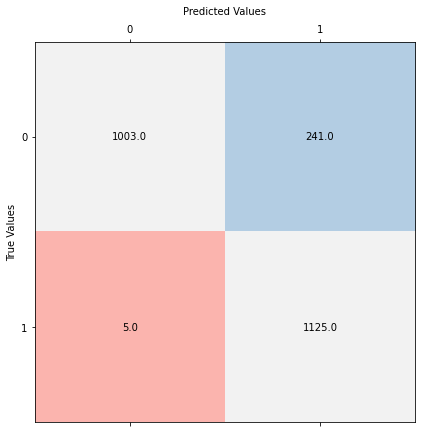

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

preds = model.predict(x_test)
preds = np.argmax(preds, axis = -1)
orig = np.argmax(y_test, axis=-1)

conf = confusion_matrix(orig, preds)

fig, ax = plt.subplots(figsize = (7,7))
ax.matshow(conf, cmap='Pastel1')

ax.set_ylabel('True Values')
ax.set_xlabel('Predicted Values', labelpad = 10)
ax.xaxis.set_label_position('top') 

for (i, j), z in np.ndenumerate(conf):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

In [29]:
pred_X_test =[]

pred_Y_test =[]

pred_X_test = pred_data

pred_Y_test = pred_labels

In [30]:
print(model.evaluate(pred_X_test, pred_Y_test))

291/291 [==============================] - 0s 360us/step
[15.167696752908713, 0.013745704665780067]


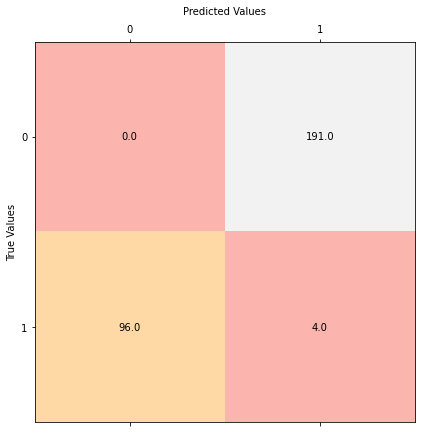

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

preds_2 = model.predict(pred_X_test)
preds_2 = np.argmax(preds_2, axis = -1)
orig_2 = np.argmax(pred_Y_test, axis=-1)

conf_2 = confusion_matrix(orig_2, preds_2)

fig_2, ax_2 = plt.subplots(figsize = (7,7))
ax_2.matshow(conf_2, cmap='Pastel1')

ax_2.set_ylabel('True Values')
ax_2.set_xlabel('Predicted Values', labelpad = 10)
ax_2.xaxis.set_label_position('top') 

for (x, y), w in np.ndenumerate(conf_2):
    ax_2.text(y, x, '{:0.1f}'.format(w), ha='center', va='center')
plt.show()